In [77]:
import pandas as pd

# Load the CSV file
file_path = r"C:\Users\clint\Desktop\Lifecycle_RA\Data\Processed\Combined_Csvs\combined_data.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the data
data

,Date,4YO,5YO,3-5YO Avg.,Source_File,3YO,6YO,2YO
0,2015-01-01,80000,70000.0,93000.0,02_2018.csv,NaN,NaN,NaN
1,2015-01-01,79000,69000.0,80000.0,06_2018.csv,NaN,NaN,NaN
2,2015-01-01,78000,69000.0,93000.0,05_2018_2.csv,NaN,NaN,NaN
3,2015-01-01,80000,69000.0,78000.0,08_2018.csv,NaN,NaN,NaN
4,2015-01-01,78000,69000.0,80000.0,04_2018.csv,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2412,2024-11-01,62000,49000.0,NaN,01_2025_2.csv,NaN,36000.0,NaN
2413,2024-12-01,60000,39000.0,NaN,03_2025.csv,NaN,35000.0,NaN
2414,2024-12-01,60000,47000.0,NaN,01_2025_2.csv,NaN,35000.0,NaN
2415,2025-01-01,108000,56000.0,NaN,03_2025.csv,NaN,52000.0,NaN


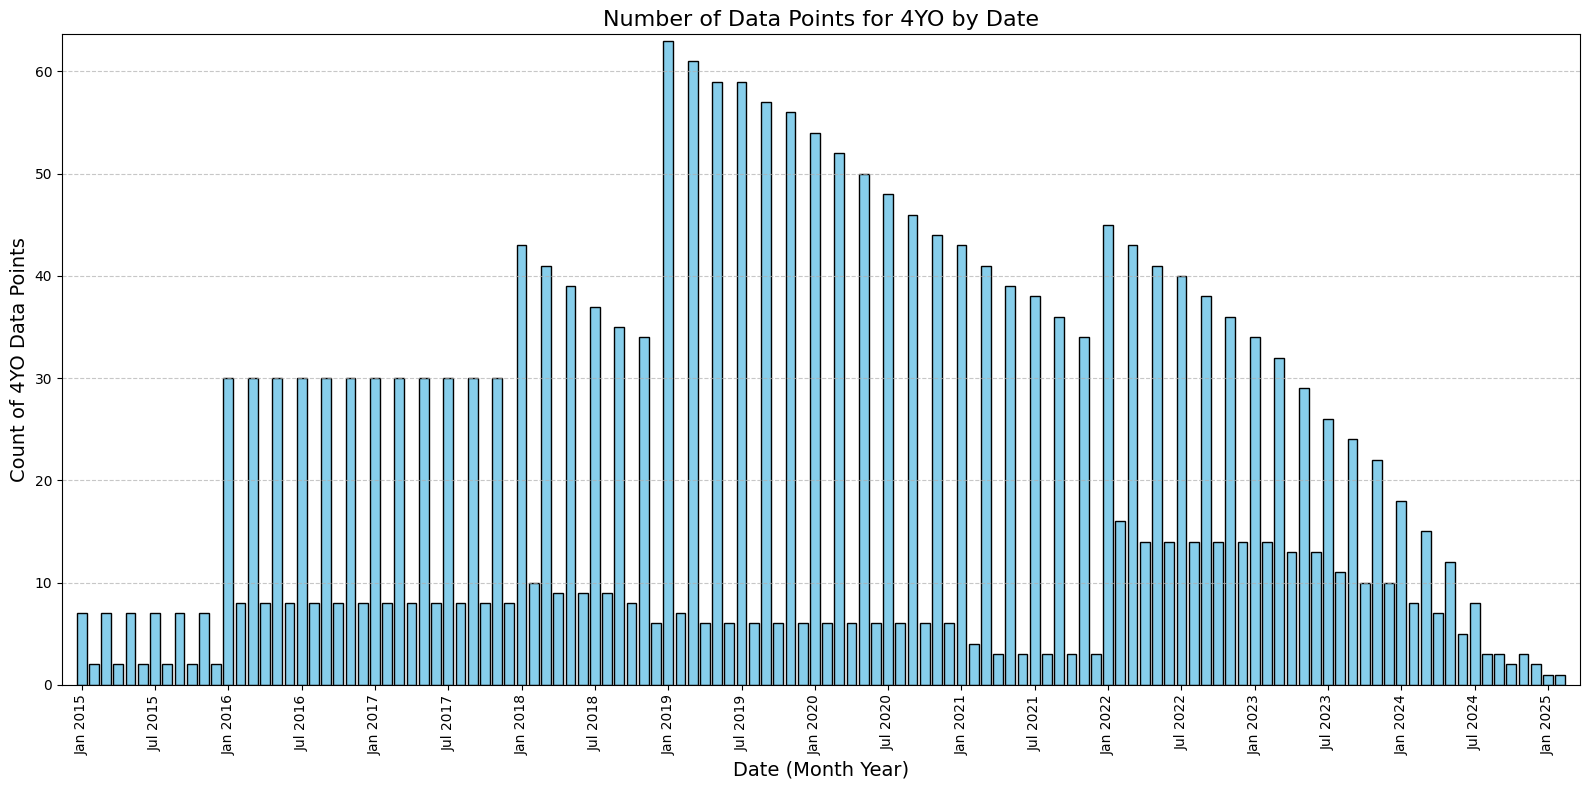

In [78]:
import matplotlib.pyplot as plt
import numpy as np

# Convert the Date column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Group by Date and count non-null values in the 4YO column
date_counts = data.groupby('Date')['4YO'].count().reset_index()

# Format the dates to show only month and year
date_counts['formatted_date'] = date_counts['Date'].dt.strftime('%b %Y')

# Plot the histogram with improved x-axis
plt.figure(figsize=(16, 8))

# Create bar chart with formatted dates
bars = plt.bar(range(len(date_counts)), date_counts['4YO'], color='skyblue', edgecolor='black')

# Only show a subset of x-ticks to prevent overcrowding (every 6 months)
tick_positions = range(0, len(date_counts), 6)
plt.xticks(tick_positions, [date_counts['formatted_date'][i] for i in tick_positions], rotation=90)

# Add labels and title
plt.title('Number of Data Points for 4YO by Date', fontsize=16)
plt.xlabel('Date (Month Year)', fontsize=14)
plt.ylabel('Count of 4YO Data Points', fontsize=14)

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Set margins to give the plot more space
plt.margins(0.01)
plt.tight_layout()
plt.show()

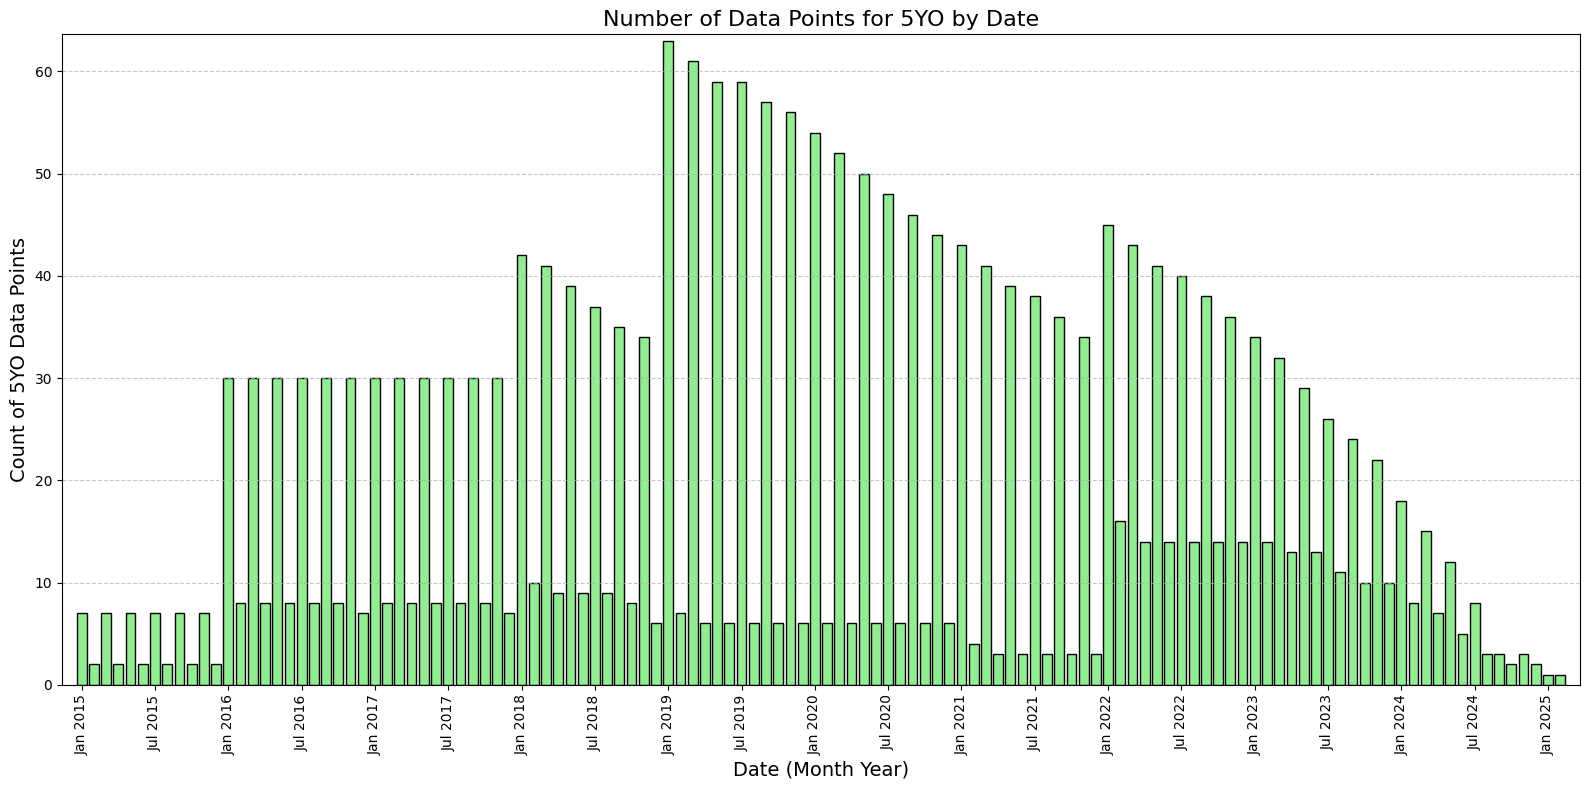

In [79]:
# Similar visualization for 5YO data
import matplotlib.pyplot as plt
import numpy as np

# Group by Date and count non-null values in the 5YO column
date_counts_5yo = data.groupby('Date')['5YO'].count().reset_index()

# Format the dates to show only month and year
date_counts_5yo['formatted_date'] = date_counts_5yo['Date'].dt.strftime('%b %Y')

# Plot the histogram with improved x-axis
plt.figure(figsize=(16, 8))

# Create bar chart with formatted dates
bars_5yo = plt.bar(range(len(date_counts_5yo)), date_counts_5yo['5YO'], color='lightgreen', edgecolor='black')

# Only show a subset of x-ticks to prevent overcrowding (every 6 months)
tick_positions = range(0, len(date_counts_5yo), 6)
plt.xticks(tick_positions, [date_counts_5yo['formatted_date'][i] for i in tick_positions], rotation=90)

# Add labels and title
plt.title('Number of Data Points for 5YO by Date', fontsize=16)
plt.xlabel('Date (Month Year)', fontsize=14)
plt.ylabel('Count of 5YO Data Points', fontsize=14)

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Set margins to give the plot more space
plt.margins(0.01)
plt.tight_layout()
plt.show()

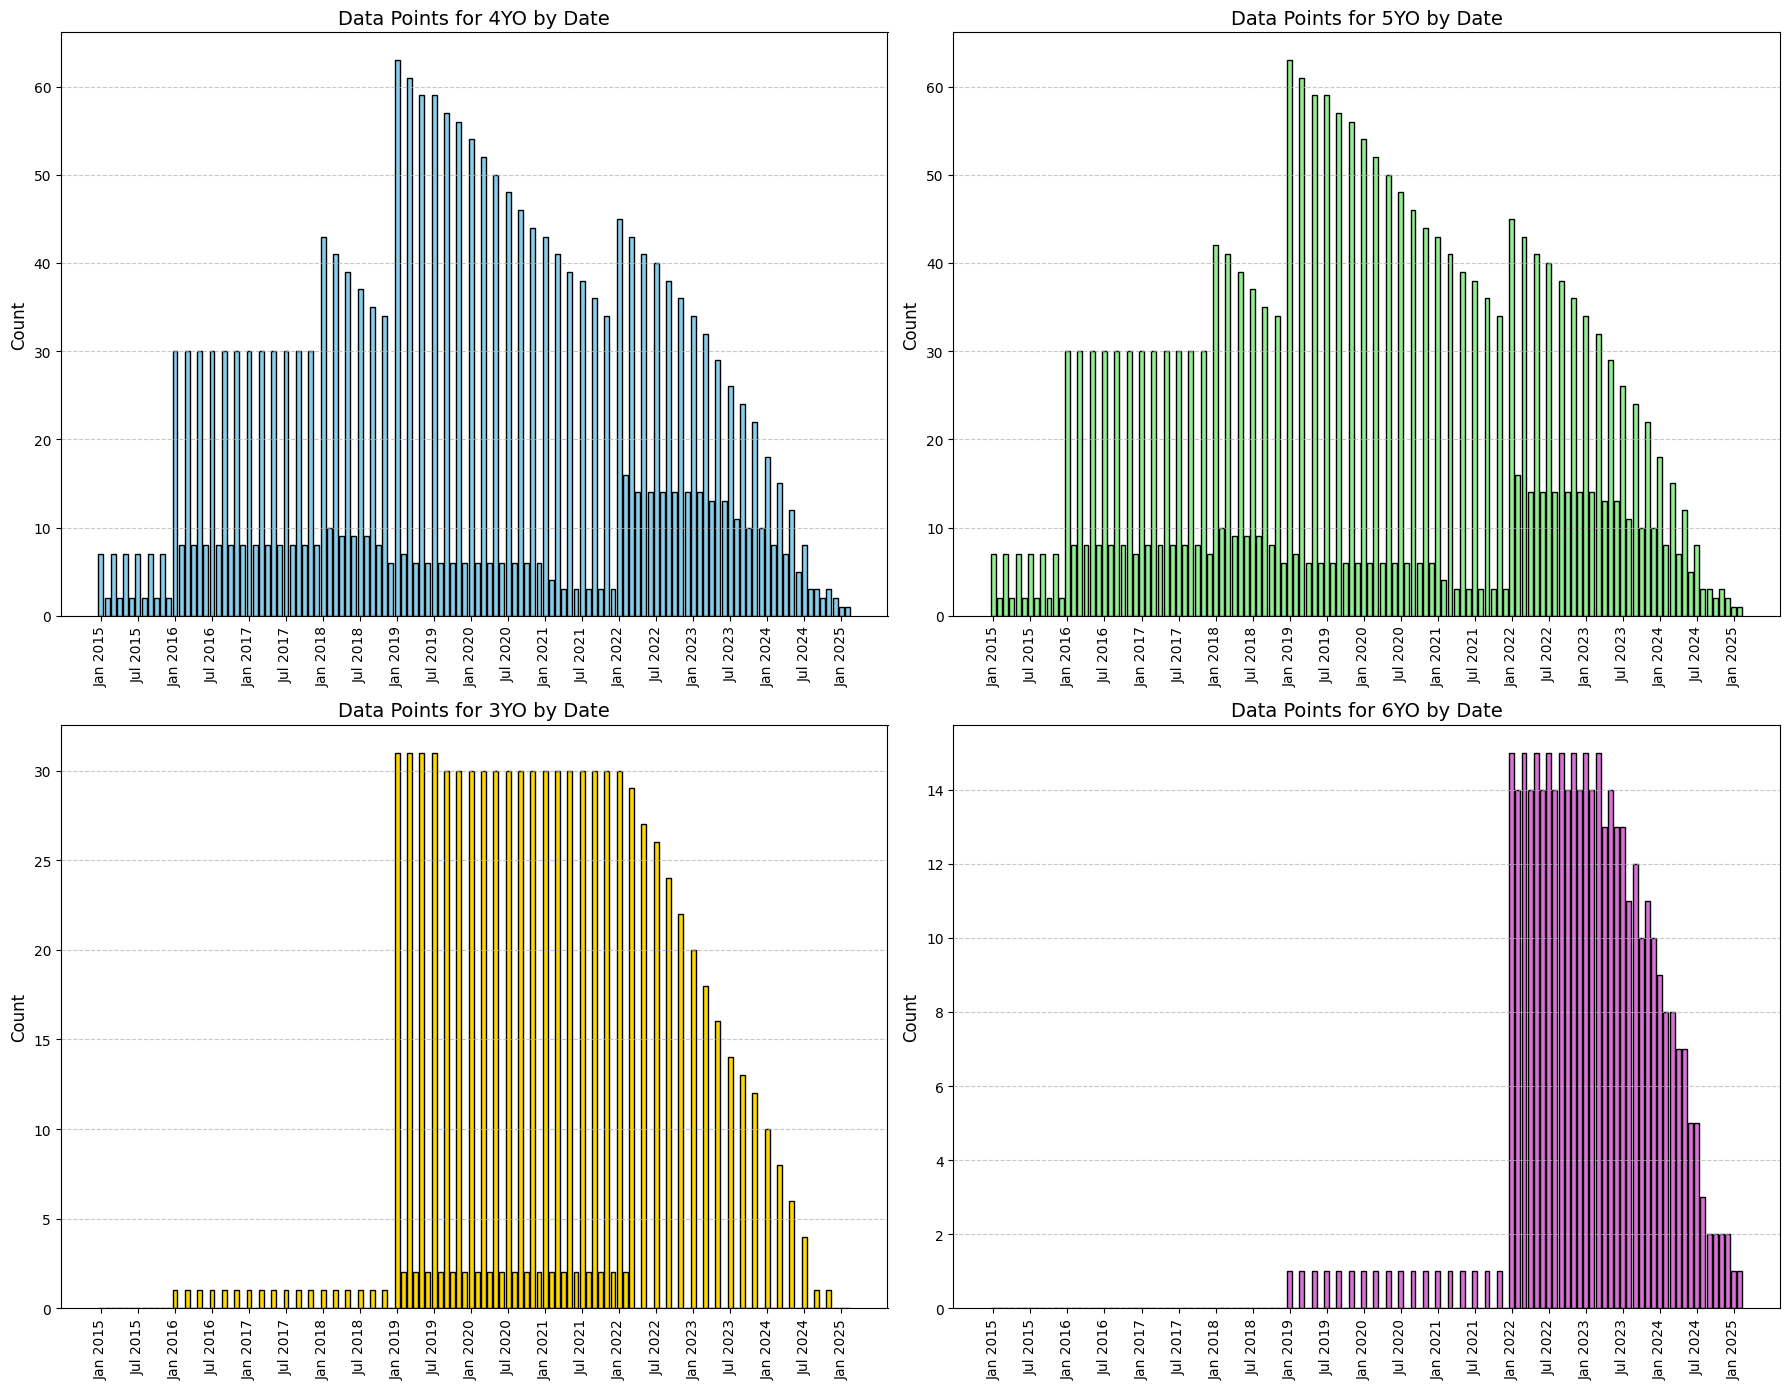

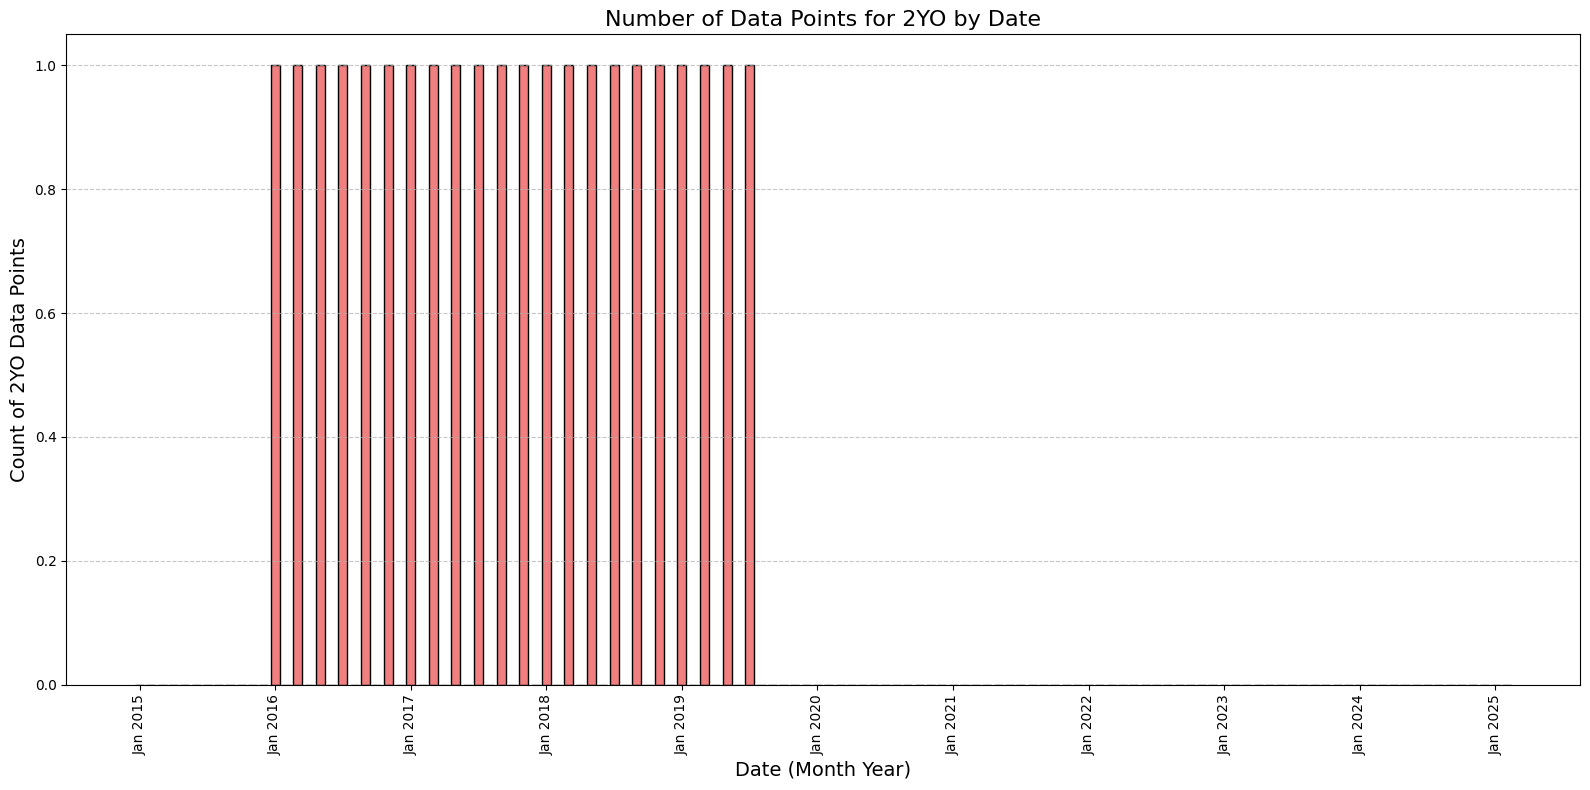

In [80]:
# Create visualizations for 3YO, 6YO, and 2YO data
import matplotlib.pyplot as plt
import numpy as np

# Function to generate count data for a specific column
def get_date_counts(column_name):
    counts = data.groupby('Date')[column_name].count().reset_index()
    counts['formatted_date'] = counts['Date'].dt.strftime('%b %Y')
    return counts

# Get counts for each age group
date_counts_3yo = get_date_counts('3YO')
date_counts_6yo = get_date_counts('6YO')
date_counts_2yo = get_date_counts('2YO')

# Create a 2x2 grid of subplots for all age groups
fig, axs = plt.subplots(2, 2, figsize=(18, 14))

# Configure color scheme for consistency
colors = {
    '2YO': 'lightcoral',
    '3YO': 'gold',
    '4YO': 'skyblue',
    '5YO': 'lightgreen',
    '6YO': 'orchid'
}

# Helper function to create a bar plot in a given axis
def plot_age_group(ax, date_counts, column_name):
    ax.bar(range(len(date_counts)), date_counts[column_name], color=colors[column_name], edgecolor='black')
    ax.set_title(f'Data Points for {column_name} by Date', fontsize=14)
    ax.set_ylabel('Count', fontsize=12)
    tick_positions = range(0, len(date_counts), 6)
    ax.set_xticks(tick_positions)
    ax.set_xticklabels([date_counts['formatted_date'][i] for i in tick_positions], rotation=90)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Plot each age group
plot_age_group(axs[0, 0], date_counts, '4YO')  # 4YO in top-left
plot_age_group(axs[0, 1], date_counts_5yo, '5YO')  # 5YO in top-right
plot_age_group(axs[1, 0], date_counts_3yo, '3YO')  # 3YO in bottom-left
plot_age_group(axs[1, 1], date_counts_6yo, '6YO')  # 6YO in bottom-right

plt.tight_layout()
plt.show()

# Create a separate plot for 2YO since it has very few data points
plt.figure(figsize=(16, 8))
plt.bar(range(len(date_counts_2yo)), date_counts_2yo['2YO'], color=colors['2YO'], edgecolor='black')
plt.title('Number of Data Points for 2YO by Date', fontsize=16)
plt.xlabel('Date (Month Year)', fontsize=14)
plt.ylabel('Count of 2YO Data Points', fontsize=14)
tick_positions = range(0, len(date_counts_2yo), max(1, len(date_counts_2yo) // 10))
plt.xticks(tick_positions, [date_counts_2yo['formatted_date'][i] for i in tick_positions], rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [81]:
def analyze_age_group(data, age_group):
    # Filter dates with multiple records for this age group
    range_stats = data.groupby('Date')[age_group].agg(['min', 'max', 'mean', 'std', 'count']).reset_index()
    range_stats['range'] = range_stats['max'] - range_stats['min']
    range_stats_multi = range_stats[range_stats['count'] > 1].copy()
    range_stats_multi = range_stats_multi.sort_values('Date')

    # Create a visualization of the ranges
    plt.figure(figsize=(16, 8))

    # Plot mean values
    plt.plot(range_stats_multi['Date'], range_stats_multi['mean'], 'o-', color='blue', label=f'Mean {age_group} Value')

    # Plot the min-max range as a shaded area
    plt.fill_between(
        range_stats_multi['Date'],
        range_stats_multi['min'],
        range_stats_multi['max'],
        alpha=0.3,
        color='skyblue',
        label='Min-Max Range'
    )

    # Format the plot
    plt.title(f'Range of {age_group} Values by Date', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel(f'{age_group} Value', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.legend()

    # Format x-axis
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    plt.xticks(rotation=90)

    plt.tight_layout()
    plt.show()

    # Create boxplot for dates with largest variations
    top_range_dates = range_stats_multi.nlargest(10, 'range')
    print(f"\nDates with the largest variation in {age_group} values:")
    print(top_range_dates[['Date', 'min', 'max', 'range', 'count']].to_string())

    # Create boxplot for these dates
    plt.figure(figsize=(16, 8))

    # Filter original data to only include top range dates
    plot_data = data[data['Date'].isin(top_range_dates['Date'])]
    plot_data['Date_Str'] = plot_data['Date'].dt.strftime('%Y-%m-%d')

    # Create the boxplot
    sns.boxplot(x='Date_Str', y=age_group, data=plot_data)
    plt.xticks(rotation=90)
    plt.title(f'Boxplot of {age_group} Values for Dates with Highest Variation', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel(f'{age_group} Value', fontsize=14)

    plt.tight_layout()
    plt.show()

    # Print summary statistics
    print(f"\nSummary of {age_group} value distribution:")
    print(f"Total days with data: {len(range_stats)}")
    print(f"Days with multiple records: {len(range_stats_multi)}")
    print(f"Maximum range observed: {range_stats_multi['range'].max()} (on {range_stats_multi.loc[range_stats_multi['range'].idxmax(), 'Date'].strftime('%Y-%m-%d')})")
    print(f"Average range across dates with multiple records: {range_stats_multi['range'].mean():.2f}")

# Time-Based Box Plot Analysis: 4YO vs 3YO

This section analyzes the distribution of values for 4YO and 3YO data over time using box plots.

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
from scipy import stats

# First, prepare the data - create a subset with both 3YO and 4YO data
# Filter for rows that have both 3YO and 4YO values
both_data = data.dropna(subset=['3YO', '4YO']).copy()

# Check how many records we have
print(f"Total records with both 3YO and 4YO data: {len(both_data)}")

# Add quarter information for time-based grouping
both_data['Year-Quarter'] = both_data['Date'].dt.to_period('Q')
both_data['Year-Quarter'] = both_data['Year-Quarter'].astype(str)

# If there are too few quarters with both data, we'll have to make separate box plots
quarters_with_both = both_data['Year-Quarter'].nunique()
print(f"Number of quarters with both 3YO and 4YO data: {quarters_with_both}")

Total records with both 3YO and 4YO data: 881
Number of quarters with both 3YO and 4YO data: 36


In [83]:
# If we don't have enough data with both values, prepare separate datasets
# Add quarter information to the full dataset
data['Year-Quarter'] = data['Date'].dt.to_period('Q')
data['Year-Quarter'] = data['Year-Quarter'].astype(str)

# Create dataframes for 3YO and 4YO with quarters that have at least 3 data points
data_3yo = data.dropna(subset=['3YO']).copy()
data_4yo = data.dropna(subset=['4YO']).copy()

# Count data points per quarter
quarter_counts_3yo = data_3yo.groupby('Year-Quarter')['3YO'].count()
quarter_counts_4yo = data_4yo.groupby('Year-Quarter')['4YO'].count()

# Filter for quarters with at least 3 data points (for meaningful box plots)
valid_quarters_3yo = quarter_counts_3yo[quarter_counts_3yo >= 3].index.tolist()
valid_quarters_4yo = quarter_counts_4yo[quarter_counts_4yo >= 3].index.tolist()

print(f"Quarters with at least 3 data points for 3YO: {len(valid_quarters_3yo)}")
print(f"Quarters with at least 3 data points for 4YO: {len(valid_quarters_4yo)}")

Quarters with at least 3 data points for 3YO: 23
Quarters with at least 3 data points for 4YO: 40


In [84]:
# Create a melted version of the data for side-by-side box plots
# This will contain all available data for each age group

# Filter data for the valid quarters
data_3yo_filtered = data_3yo[data_3yo['Year-Quarter'].isin(valid_quarters_3yo)]
data_4yo_filtered = data_4yo[data_4yo['Year-Quarter'].isin(valid_quarters_4yo)]

# Prepare a melted dataframe for 3YO with age group identifier
melted_3yo = data_3yo_filtered[['Year-Quarter', '3YO']].copy()
melted_3yo['Age_Group'] = '3YO'
melted_3yo.rename(columns={'3YO': 'Value'}, inplace=True)

# Prepare a melted dataframe for 4YO with age group identifier
melted_4yo = data_4yo_filtered[['Year-Quarter', '4YO']].copy()
melted_4yo['Age_Group'] = '4YO'
melted_4yo.rename(columns={'4YO': 'Value'}, inplace=True)

# Combine the dataframes
combined_melted = pd.concat([melted_3yo, melted_4yo], ignore_index=True)

# Print the shape of our combined data
print(f"Combined data shape: {combined_melted.shape}")

Combined data shape: (3277, 3)


C:\Users\clint\AppData\Local\Temp\ipykernel_44700\916954099.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Age_Group', y='Value', data=combined_melted, palette={'3YO': colors['3YO'], '4YO': colors['4YO']})


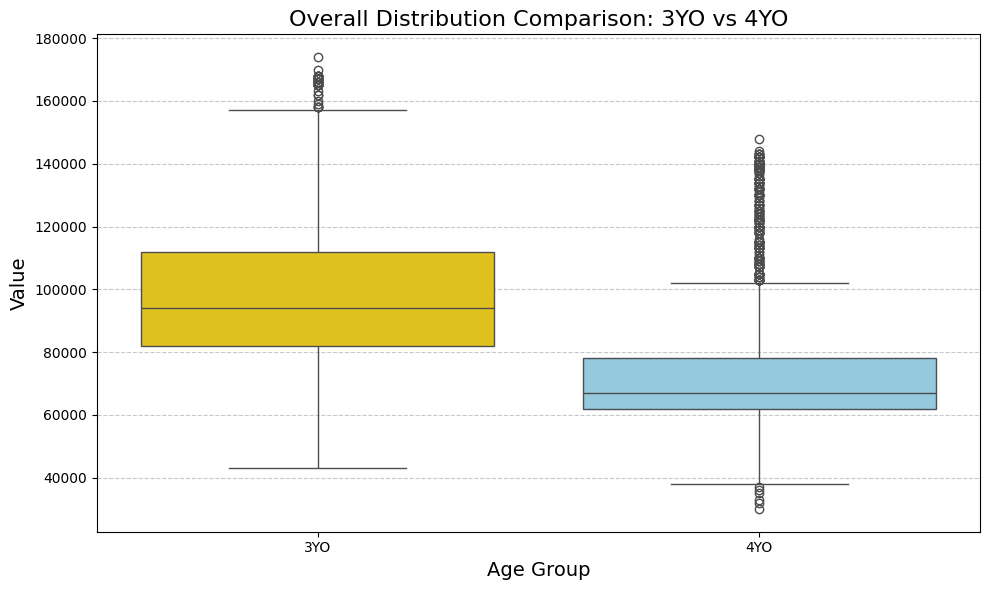

Summary Statistics:
                    mean   median           std      min       max
Age_Group                                                         
3YO        100344.547564  94000.0  26026.714351  43000.0  174000.0
4YO         74607.867495  67000.0  22164.203719  30000.0  148000.0

T-test results comparing 3YO vs 4YO:
t-statistic: 25.8761
p-value: 0.0000
Statistically significant difference: True


In [85]:
# Create overall box plots comparing 3YO and 4YO distributions
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age_Group', y='Value', data=combined_melted, palette={'3YO': colors['3YO'], '4YO': colors['4YO']})

plt.title('Overall Distribution Comparison: 3YO vs 4YO', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Format y-axis to show in thousands
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

# Calculate and print summary statistics
summary_stats = combined_melted.groupby('Age_Group')['Value'].agg(['mean', 'median', 'std', 'min', 'max'])
print("Summary Statistics:")
print(summary_stats)

# Perform t-test to check if the means are significantly different
t_stat, p_value = stats.ttest_ind(
    combined_melted[combined_melted['Age_Group'] == '3YO']['Value'], 
    combined_melted[combined_melted['Age_Group'] == '4YO']['Value'],
    equal_var=False  # Using Welch's t-test which doesn't assume equal variances
)
print(f"\nT-test results comparing 3YO vs 4YO:")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")
print(f"Statistically significant difference: {p_value < 0.05}")

Number of quarters with sufficient data for both age groups: 23


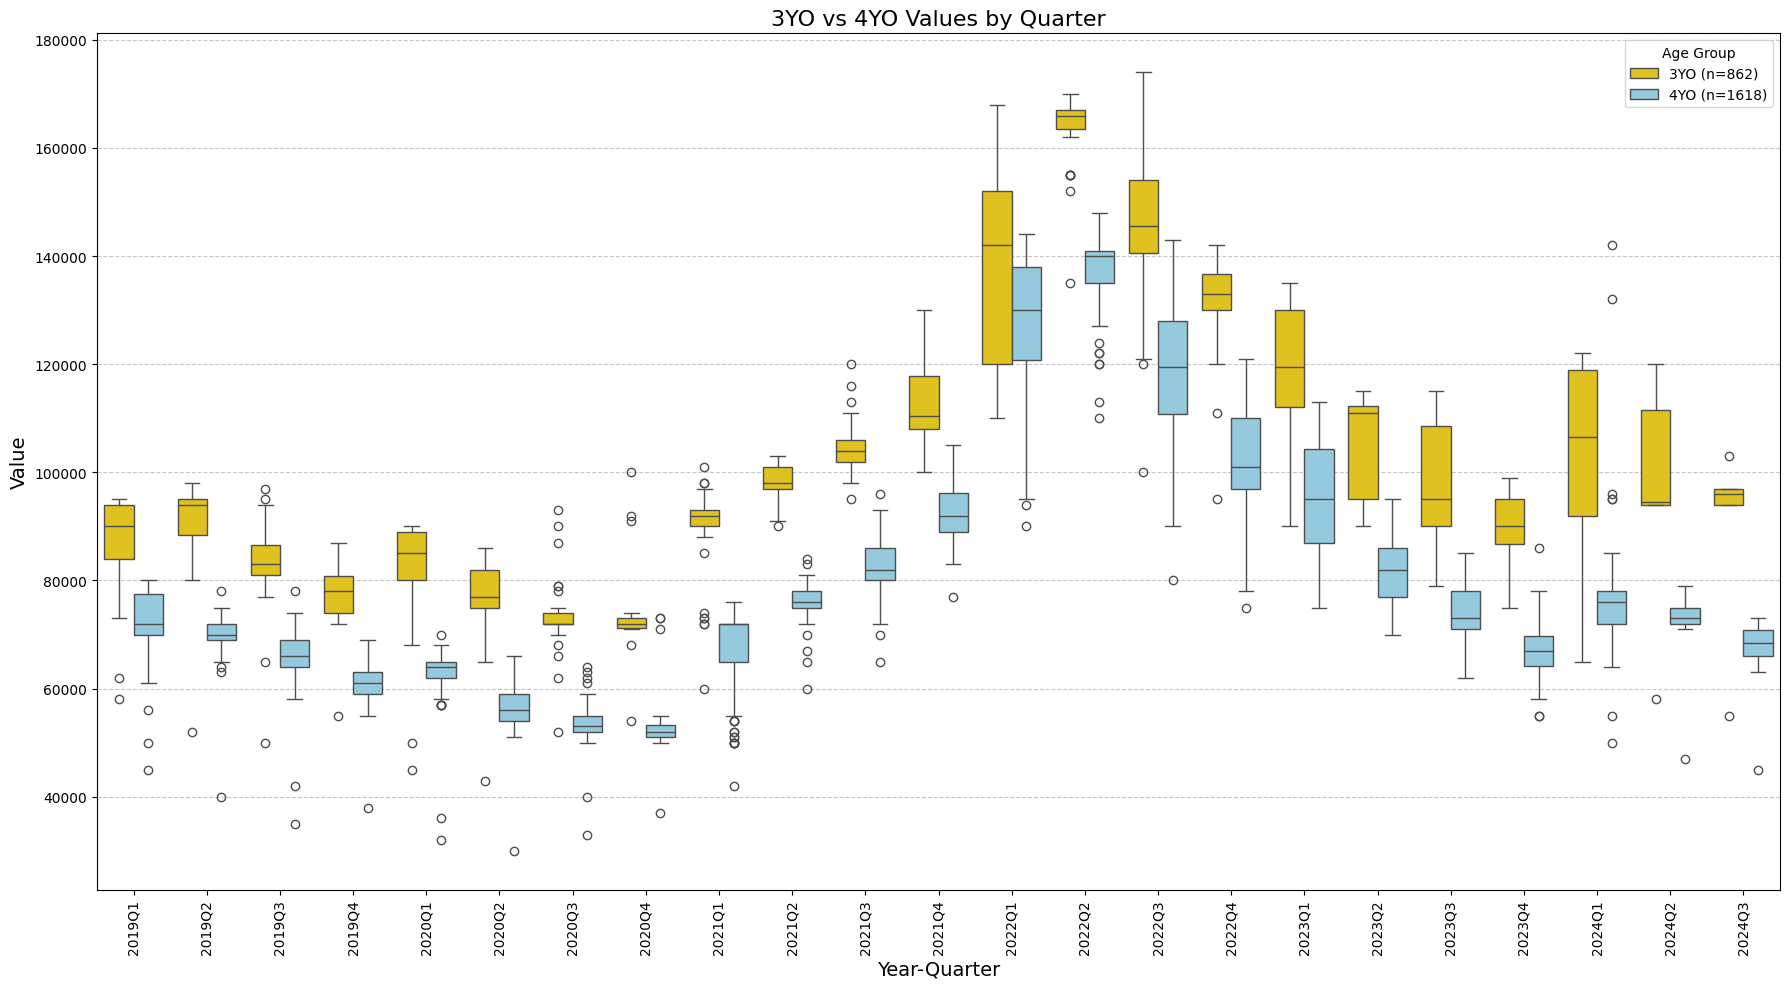

In [86]:
# Find common quarters for side-by-side time series comparison
common_quarters = sorted(set(valid_quarters_3yo).intersection(set(valid_quarters_4yo)))
print(f"Number of quarters with sufficient data for both age groups: {len(common_quarters)}")

if len(common_quarters) >= 3:
    # Filter data for common quarters
    common_data = combined_melted[combined_melted['Year-Quarter'].isin(common_quarters)]
    
    # Create time-based box plots
    plt.figure(figsize=(18, 10))
    
    # Create the box plot with quarter on x-axis, split by age group
    ax = sns.boxplot(x='Year-Quarter', y='Value', hue='Age_Group', 
                    data=common_data, 
                    palette={"3YO": colors['3YO'], "4YO": colors['4YO']})
    
    # Customize the plot
    plt.title('3YO vs 4YO Values by Quarter', fontsize=16)
    plt.xlabel('Year-Quarter', fontsize=14)
    plt.ylabel('Value', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Rotate x-tick labels for better readability
    plt.xticks(rotation=90)
    
    # Add data point counts to the legend
    handles, labels = ax.get_legend_handles_labels()
    counts = common_data.groupby('Age_Group').size()
    labels = [f"{label} (n={counts[label]})" for label in labels]
    plt.legend(handles, labels, title="Age Group")
    
    plt.tight_layout()
    plt.show()
else:
    print("Not enough common quarters with sufficient data for side-by-side time series comparison.")

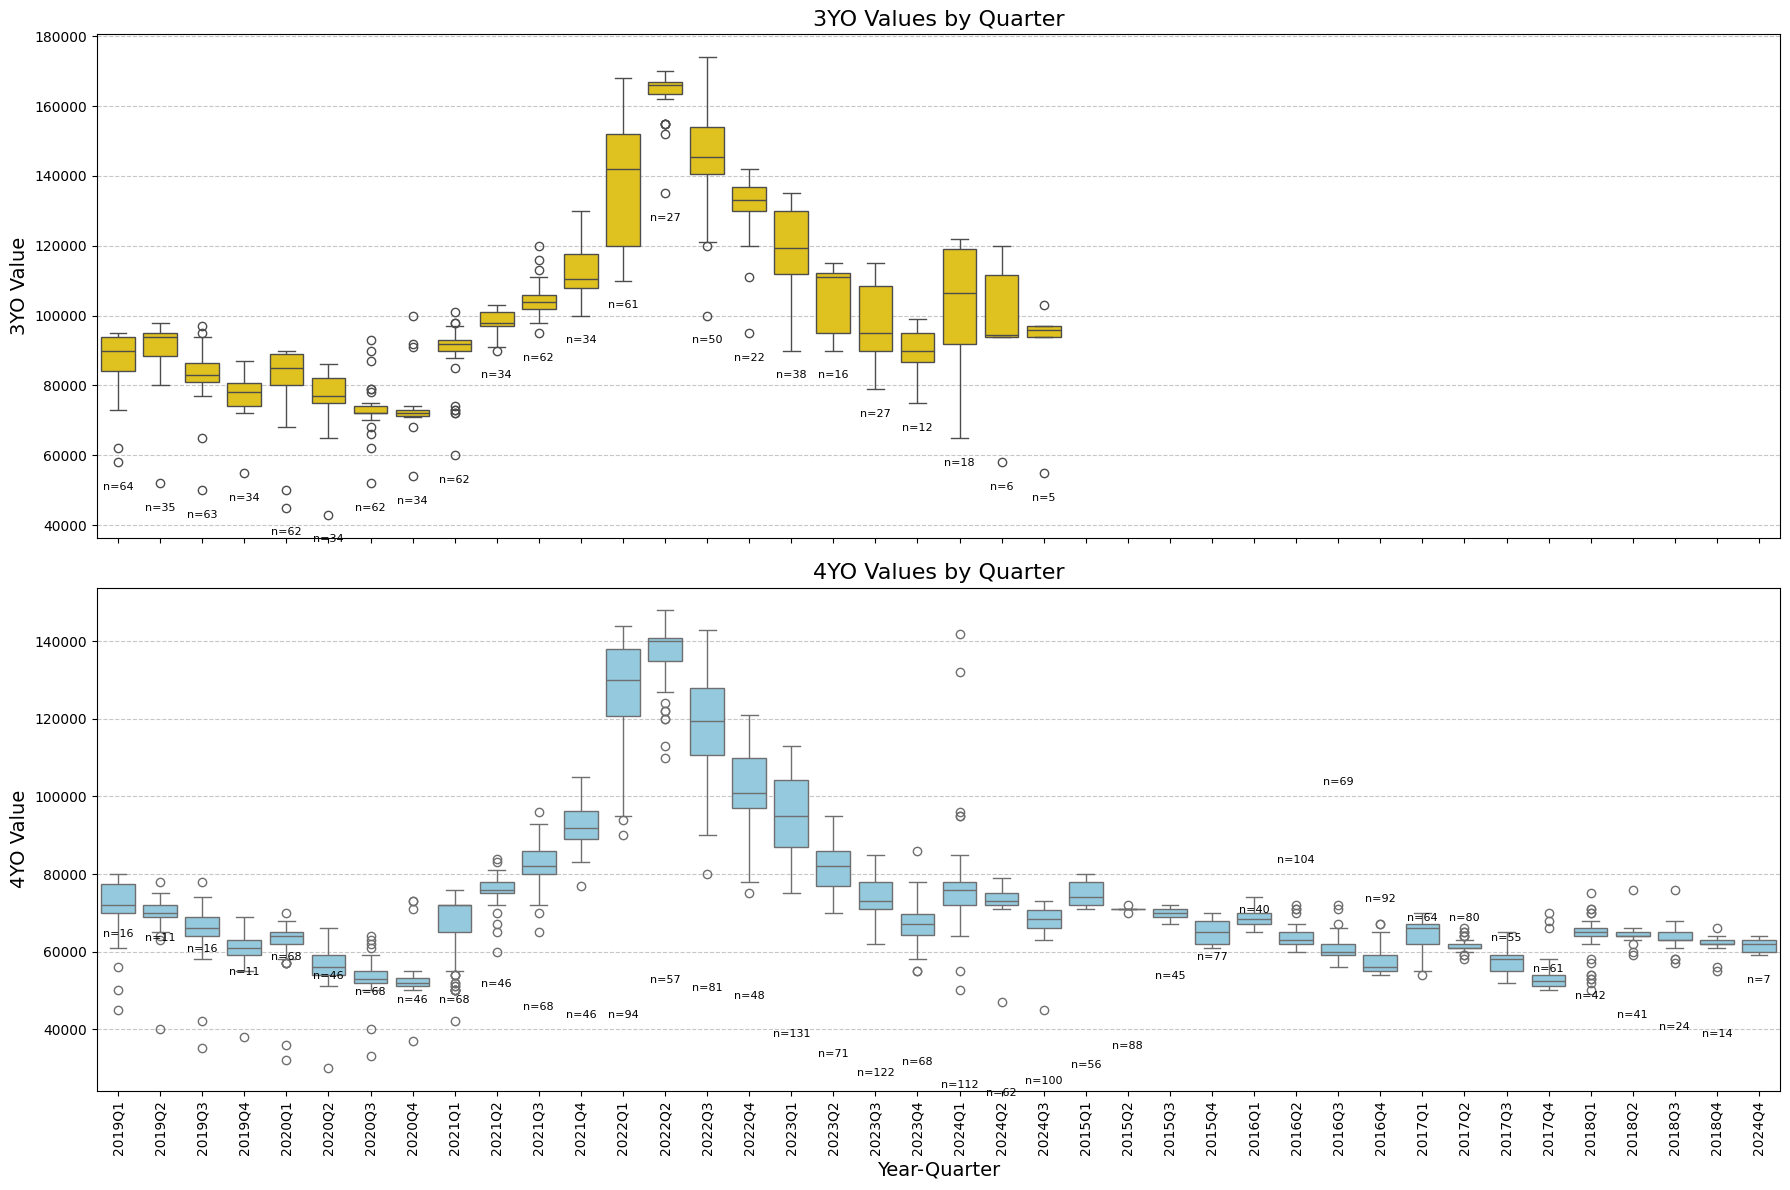

In [87]:
# Create separate time series box plots for each age group
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 12), sharex=True)

# 3YO time series
sns.boxplot(x='Year-Quarter', y='Value', data=melted_3yo, ax=ax1, color=colors['3YO'])
ax1.set_title('3YO Values by Quarter', fontsize=16)
ax1.set_ylabel('3YO Value', fontsize=14)
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax1.tick_params(axis='x', rotation=90)

# 4YO time series
sns.boxplot(x='Year-Quarter', y='Value', data=melted_4yo, ax=ax2, color=colors['4YO'])
ax2.set_title('4YO Values by Quarter', fontsize=16)
ax2.set_xlabel('Year-Quarter', fontsize=14)
ax2.set_ylabel('4YO Value', fontsize=14)
ax2.grid(axis='y', linestyle='--', alpha=0.7)
ax2.tick_params(axis='x', rotation=90)

# Add annotations with count of data points
for quarter in valid_quarters_3yo:
    count = len(melted_3yo[melted_3yo['Year-Quarter'] == quarter])
    q_idx = list(melted_3yo['Year-Quarter'].unique()).index(quarter)
    ax1.annotate(f"n={count}", 
                xy=(q_idx, melted_3yo[melted_3yo['Year-Quarter'] == quarter]['Value'].min()), 
                xytext=(0, -20), textcoords='offset points',
                ha='center', fontsize=8)

for quarter in valid_quarters_4yo:
    count = len(melted_4yo[melted_4yo['Year-Quarter'] == quarter])
    q_idx = list(melted_4yo['Year-Quarter'].unique()).index(quarter)
    ax2.annotate(f"n={count}", 
                xy=(q_idx, melted_4yo[melted_4yo['Year-Quarter'] == quarter]['Value'].min()), 
                xytext=(0, -20), textcoords='offset points',
                ha='center', fontsize=8)

plt.tight_layout()
plt.show()

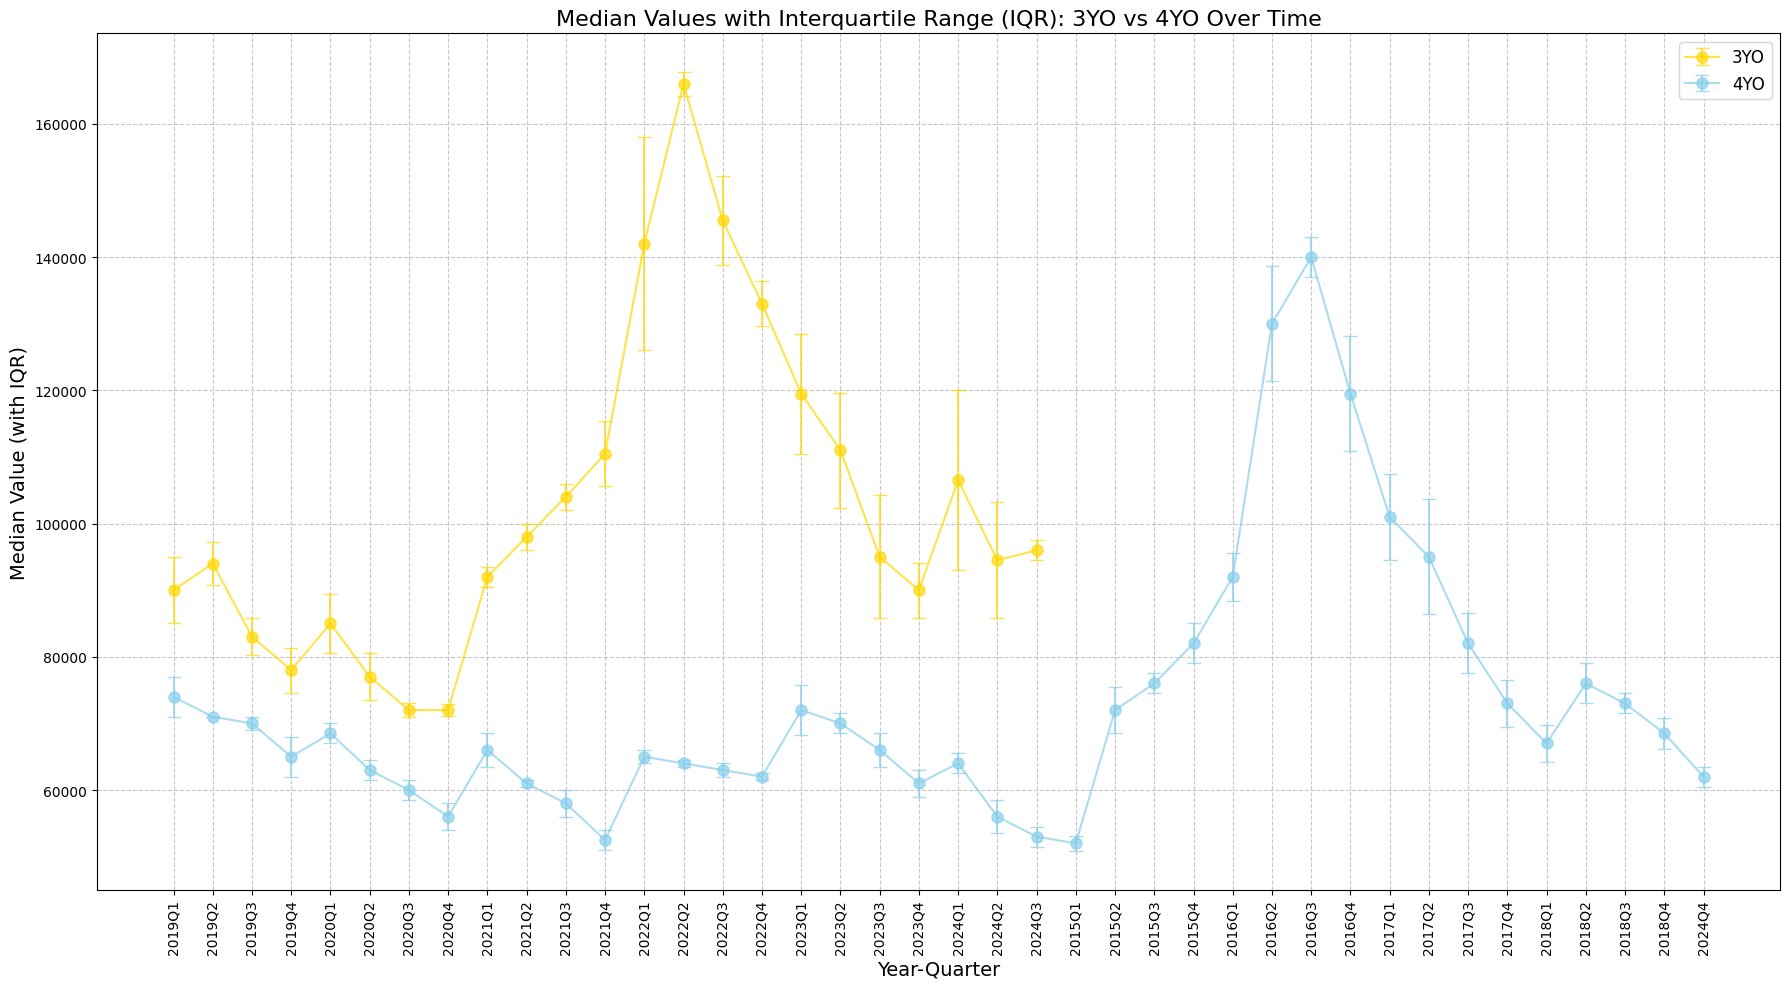

In [88]:
# Calculate quarterly median and interquartile range for trend analysis
quarterly_stats_3yo = melted_3yo.groupby('Year-Quarter')['Value'].agg(['median', lambda x: x.quantile(0.75) - x.quantile(0.25)])
quarterly_stats_3yo.rename(columns={'<lambda_0>': 'IQR'}, inplace=True)

quarterly_stats_4yo = melted_4yo.groupby('Year-Quarter')['Value'].agg(['median', lambda x: x.quantile(0.75) - x.quantile(0.25)])
quarterly_stats_4yo.rename(columns={'<lambda_0>': 'IQR'}, inplace=True)

# Prepare data for trend visualization
quarterly_stats_3yo['Age_Group'] = '3YO'
quarterly_stats_4yo['Age_Group'] = '4YO'

# Reset indices for plotting
quarterly_stats_3yo = quarterly_stats_3yo.reset_index()
quarterly_stats_4yo = quarterly_stats_4yo.reset_index()

# Combine the data
combined_stats = pd.concat([quarterly_stats_3yo, quarterly_stats_4yo], ignore_index=True)

# Create a trend plot of medians with IQR as error bars
plt.figure(figsize=(18, 10))

for age_group, color in [('3YO', colors['3YO']), ('4YO', colors['4YO'])]:
    group_data = combined_stats[combined_stats['Age_Group'] == age_group]
    plt.errorbar(
        x=range(len(group_data)), 
        y=group_data['median'], 
        yerr=group_data['IQR']/2,  # Using IQR/2 as error bars, similar to standard error
        fmt='o-',
        label=age_group,
        color=color,
        capsize=5,
        alpha=0.7,
        markersize=8
    )

plt.xticks(
    range(len(combined_stats['Year-Quarter'].unique())),
    combined_stats['Year-Quarter'].unique(),
    rotation=90
)

plt.title('Median Values with Interquartile Range (IQR): 3YO vs 4YO Over Time', fontsize=16)
plt.xlabel('Year-Quarter', fontsize=14)
plt.ylabel('Median Value (with IQR)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

In [89]:
# Statistical comparison between 3YO and 4YO values for each common quarter
if len(common_quarters) > 0:
    print("Statistical comparison between 3YO and 4YO values by quarter:")
    print("-" * 80)
    
    for quarter in common_quarters:
        values_3yo = data_3yo[data_3yo['Year-Quarter'] == quarter]['3YO']
        values_4yo = data_4yo[data_4yo['Year-Quarter'] == quarter]['4YO']
        
        # Ensure we have enough data points for a meaningful test
        if len(values_3yo) >= 3 and len(values_4yo) >= 3:
            # Perform Mann-Whitney U test (non-parametric alternative to t-test, better for small samples)
            u_stat, p_value = stats.mannwhitneyu(values_3yo, values_4yo, alternative='two-sided')
            
            # Calculate effect size (Cohen's d)
            mean_diff = values_4yo.mean() - values_3yo.mean()
            pooled_std = np.sqrt((values_3yo.std()**2 + values_4yo.std()**2) / 2)
            effect_size = mean_diff / pooled_std if pooled_std != 0 else float('nan')
            
            # Print the results
            print(f"Quarter: {quarter}")
            print(f"  3YO: n={len(values_3yo)}, median={values_3yo.median():.2f}, mean={values_3yo.mean():.2f}, std={values_3yo.std():.2f}")
            print(f"  4YO: n={len(values_4yo)}, median={values_4yo.median():.2f}, mean={values_4yo.mean():.2f}, std={values_4yo.std():.2f}")
            print(f"  Mann-Whitney U test: U={u_stat:.2f}, p-value={p_value:.4f}")
            print(f"  Effect size (Cohen's d): {effect_size:.4f}")
            print(f"  Interpretation: {'Significant difference' if p_value < 0.05 else 'No significant difference'}")
            print("-" * 80)
        else:
            print(f"Quarter {quarter}: Insufficient data for statistical comparison")
else:
    print("No common quarters available for statistical comparison.")

Statistical comparison between 3YO and 4YO values by quarter:
--------------------------------------------------------------------------------
Quarter: 2019Q1
  3YO: n=64, median=90000.00, mean=88421.88, std=7232.65
  4YO: n=131, median=72000.00, mean=72156.49, std=5490.58
  Mann-Whitney U test: U=8081.50, p-value=0.0000
  Effect size (Cohen's d): -2.5332
  Interpretation: Significant difference
--------------------------------------------------------------------------------
Quarter: 2019Q2
  3YO: n=35, median=94000.00, mean=90714.29, std=8442.09
  4YO: n=71, median=70000.00, mean=69725.35, std=4378.35
  Mann-Whitney U test: U=2415.00, p-value=0.0000
  Effect size (Cohen's d): -3.1212
  Interpretation: Significant difference
--------------------------------------------------------------------------------
Quarter: 2019Q3
  3YO: n=63, median=83000.00, mean=83492.06, std=6625.64
  4YO: n=122, median=66000.00, mean=65913.93, std=5006.89
  Mann-Whitney U test: U=7485.00, p-value=0.0000
  Ef

# Time-Based Box Plot Analysis: 3YO vs 4YO vs 6YO

This section extends our analysis to include 6YO data alongside 3YO and 4YO for a more comprehensive age group comparison.

In [90]:
# Prepare data for 3YO, 4YO, and 6YO comparison
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

# Create dataframe for 6YO
data_6yo = data.dropna(subset=['6YO']).copy()

# Count data points per quarter for 6YO
quarter_counts_6yo = data_6yo.groupby('Year-Quarter')['6YO'].count()
valid_quarters_6yo = quarter_counts_6yo[quarter_counts_6yo >= 3].index.tolist()

print(f"Quarters with at least 3 data points for 6YO: {len(valid_quarters_6yo)}")
print(f"Valid quarters for 6YO: {valid_quarters_6yo}")

# Filter data for valid quarters
data_6yo_filtered = data_6yo[data_6yo['Year-Quarter'].isin(valid_quarters_6yo)]

# Create melted dataframe for 6YO
melted_6yo = data_6yo_filtered[['Year-Quarter', '6YO']].copy()
melted_6yo['Age_Group'] = '6YO'
melted_6yo.rename(columns={'6YO': 'Value'}, inplace=True)

# Combine all three age groups
combined_melted_all = pd.concat([melted_3yo, melted_4yo, melted_6yo], ignore_index=True)

# Print the shape of our combined data
print(f"Combined data shape for all three age groups: {combined_melted_all.shape}")
print(f"Number of data points per age group:")
print(combined_melted_all['Age_Group'].value_counts())

Quarters with at least 3 data points for 6YO: 12
Valid quarters for 6YO: ['2022Q1', '2022Q2', '2022Q3', '2022Q4', '2023Q1', '2023Q2', '2023Q3', '2023Q4', '2024Q1', '2024Q2', '2024Q3', '2024Q4']
Combined data shape for all three age groups: (3662, 3)
Number of data points per age group:
Age_Group
4YO    2415
3YO     862
6YO     385
Name: count, dtype: int64


C:\Users\clint\AppData\Local\Temp\ipykernel_44700\652026230.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Age_Group', y='Value', data=combined_melted_all,


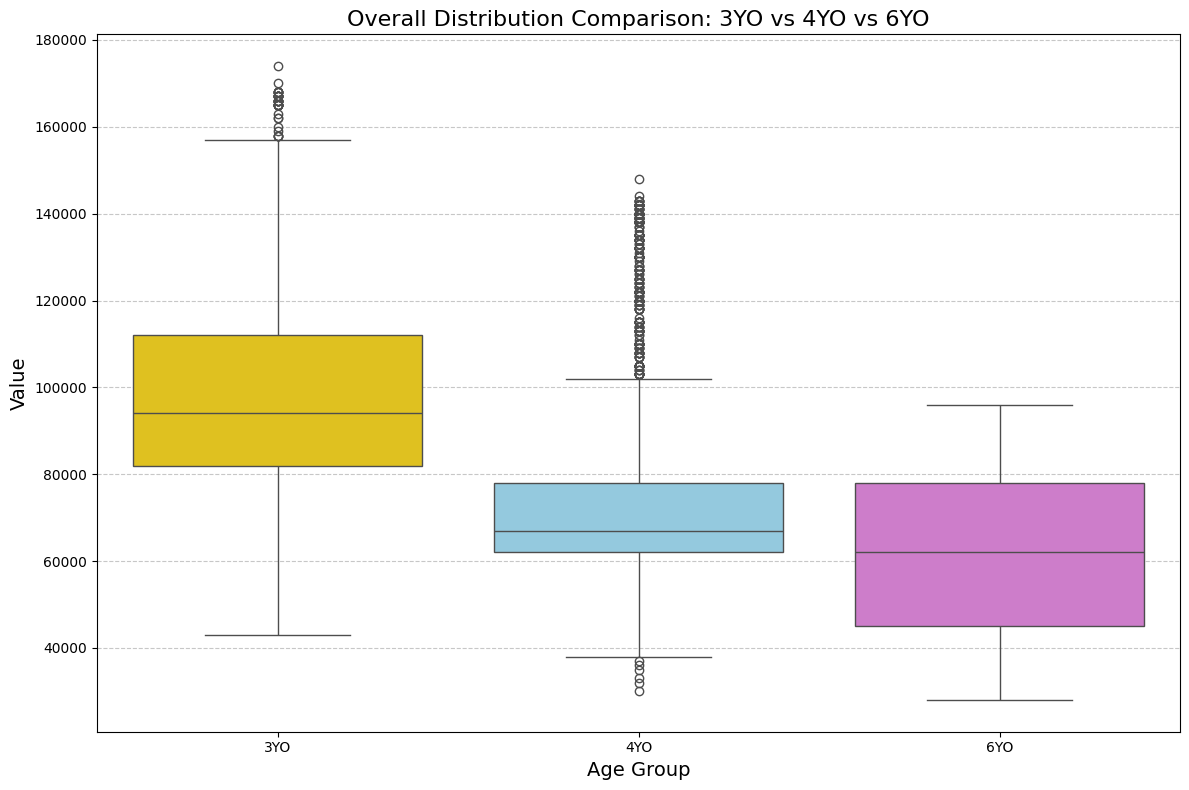

Summary Statistics:
           count           mean   median           std      min       max
Age_Group                                                                
3YO          862  100344.547564  94000.0  26026.714351  43000.0  174000.0
4YO         2415   74607.867495  67000.0  22164.203719  30000.0  148000.0
6YO          385   62264.935065  62000.0  18452.711001  28000.0   96000.0

One-way ANOVA results comparing 3YO, 4YO, and 6YO:
F-statistic: 526.3864
p-value: 0.0000000000
Statistically significant difference among the groups: True

Tukey's HSD Post-hoc Test Results:
     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj    lower       upper    reject
--------------------------------------------------------------
   3YO    4YO -25736.6801   0.0 -27856.4355 -23616.9246   True
   3YO    6YO -38079.6125   0.0 -41354.5949 -34804.6301   True
   4YO    6YO -12342.9324   0.0 -15274.8369  -9411.0279   True
----------------------------------------

In [91]:
# Create overall box plots comparing all three age groups
plt.figure(figsize=(12, 8))
sns.boxplot(x='Age_Group', y='Value', data=combined_melted_all, 
            palette={'3YO': colors['3YO'], '4YO': colors['4YO'], '6YO': colors['6YO']},
            order=['3YO', '4YO', '6YO'])

plt.title('Overall Distribution Comparison: 3YO vs 4YO vs 6YO', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Format y-axis to show in thousands
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

# Calculate and print summary statistics
summary_stats_all = combined_melted_all.groupby('Age_Group')['Value'].agg(['count', 'mean', 'median', 'std', 'min', 'max'])
print("Summary Statistics:")
print(summary_stats_all)

# Perform ANOVA to check if there are significant differences among the three groups
groups = [combined_melted_all[combined_melted_all['Age_Group'] == group]['Value'] 
          for group in ['3YO', '4YO', '6YO']]
f_stat, p_value = stats.f_oneway(*groups)

print(f"\nOne-way ANOVA results comparing 3YO, 4YO, and 6YO:")
print(f"F-statistic: {f_stat:.4f}")
print(f"p-value: {p_value:.10f}")
print(f"Statistically significant difference among the groups: {p_value < 0.05}")

# Perform post-hoc tests to identify which specific groups differ
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Prepare data for Tukey's test
tukey_data = combined_melted_all.copy()
tukey_data = tukey_data.dropna(subset=['Value'])

# Perform Tukey's test
tukey = pairwise_tukeyhsd(endog=tukey_data['Value'], groups=tukey_data['Age_Group'], alpha=0.05)
print("\nTukey's HSD Post-hoc Test Results:")
print(tukey)

Number of quarters with sufficient data for all three age groups: 11
Common quarters: ['2022Q1', '2022Q2', '2022Q3', '2022Q4', '2023Q1', '2023Q2', '2023Q3', '2023Q4', '2024Q1', '2024Q2', '2024Q3']


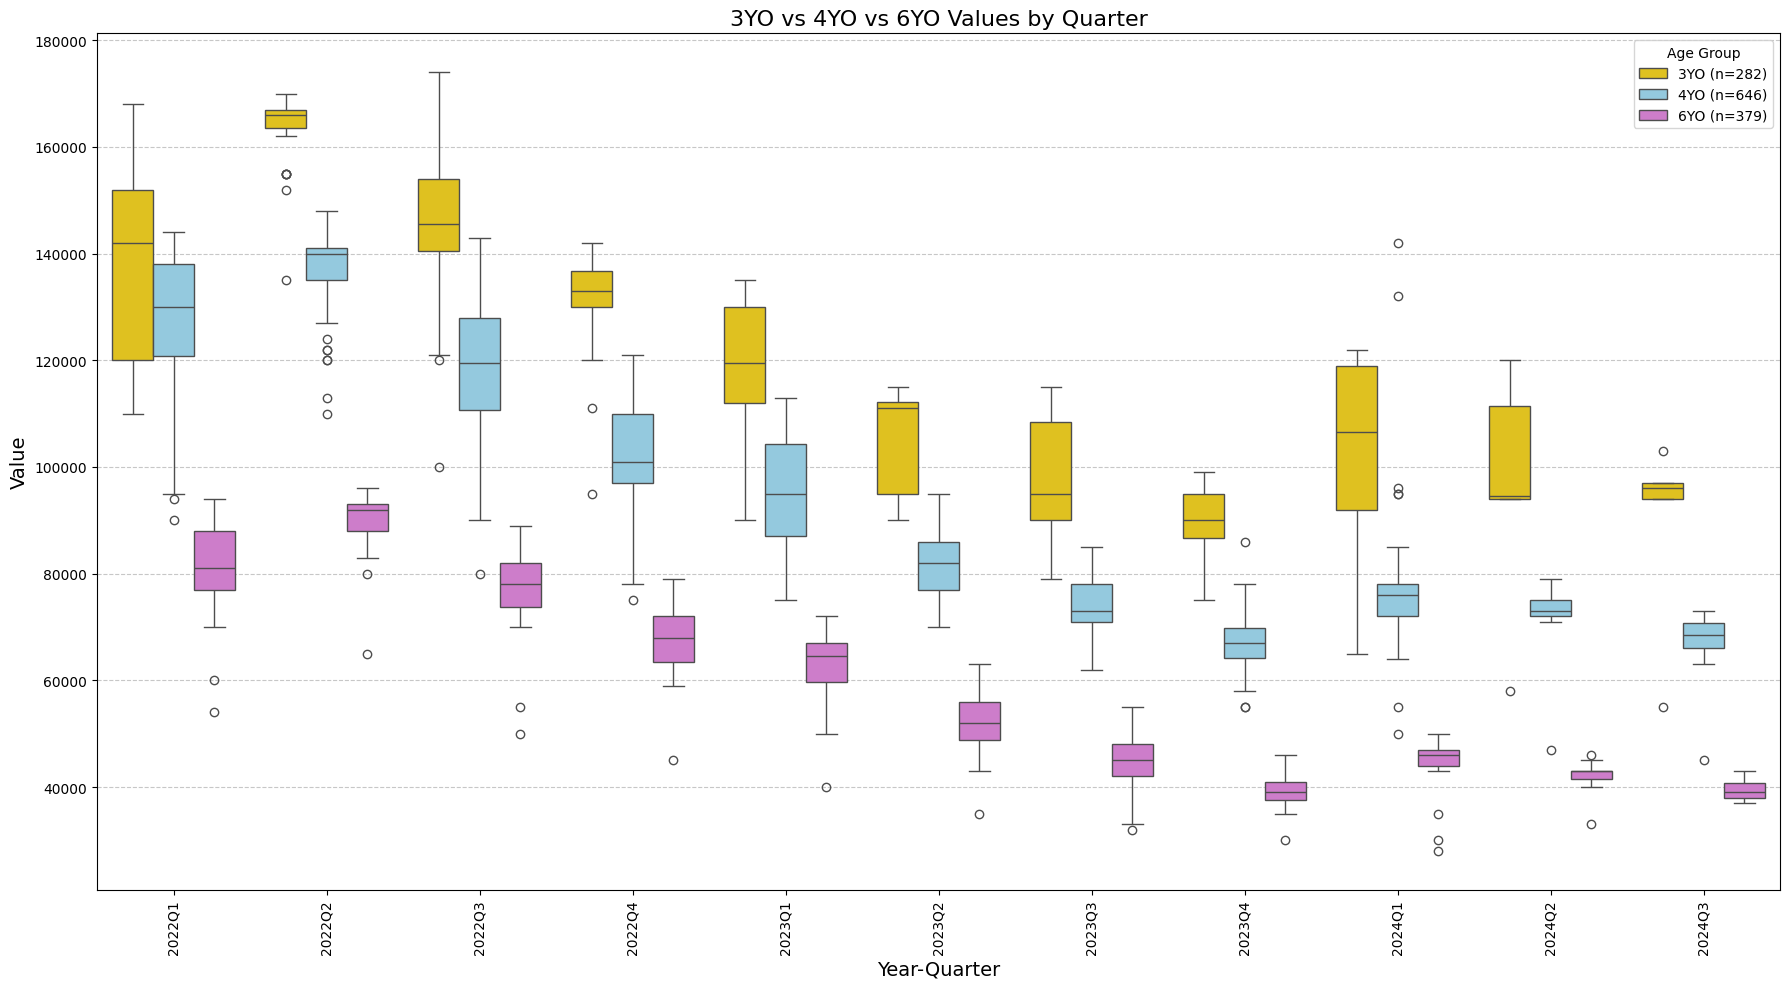

In [92]:
# Find common quarters where all three age groups have sufficient data
common_quarters_all = sorted(set(valid_quarters_3yo) & set(valid_quarters_4yo) & set(valid_quarters_6yo))
print(f"Number of quarters with sufficient data for all three age groups: {len(common_quarters_all)}")
print(f"Common quarters: {common_quarters_all}")

# Filter data for common quarters
if len(common_quarters_all) >= 1:
    common_data_all = combined_melted_all[combined_melted_all['Year-Quarter'].isin(common_quarters_all)]
    
    # Create time-based box plots
    plt.figure(figsize=(18, 10))
    
    # Create the box plot with quarter on x-axis, split by age group
    ax = sns.boxplot(x='Year-Quarter', y='Value', hue='Age_Group', 
                    data=common_data_all, 
                    palette={"3YO": colors['3YO'], "4YO": colors['4YO'], "6YO": colors['6YO']})
    
    # Customize the plot
    plt.title('3YO vs 4YO vs 6YO Values by Quarter', fontsize=16)
    plt.xlabel('Year-Quarter', fontsize=14)
    plt.ylabel('Value', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Rotate x-tick labels for better readability
    plt.xticks(rotation=90)
    
    # Add data point counts to the legend
    handles, labels = ax.get_legend_handles_labels()
    counts = common_data_all.groupby('Age_Group').size()
    labels = [f"{label} (n={counts[label]})" for label in labels]
    plt.legend(handles, labels, title="Age Group")
    
    plt.tight_layout()
    plt.show()
else:
    print("Not enough common quarters with sufficient data for all three age groups comparison.")
    
    # In case we don't have common quarters for all three groups,
    # let's try pairs of age groups
    print("\nAnalyzing pairs of age groups instead:")
    
    # 3YO and 4YO
    common_3yo_4yo = sorted(set(valid_quarters_3yo) & set(valid_quarters_4yo))
    print(f"Common quarters for 3YO and 4YO: {len(common_3yo_4yo)}")
    
    # 3YO and 6YO
    common_3yo_6yo = sorted(set(valid_quarters_3yo) & set(valid_quarters_6yo))
    print(f"Common quarters for 3YO and 6YO: {len(common_3yo_6yo)}")
    
    # 4YO and 6YO
    common_4yo_6yo = sorted(set(valid_quarters_4yo) & set(valid_quarters_6yo))
    print(f"Common quarters for 4YO and 6YO: {len(common_4yo_6yo)}")

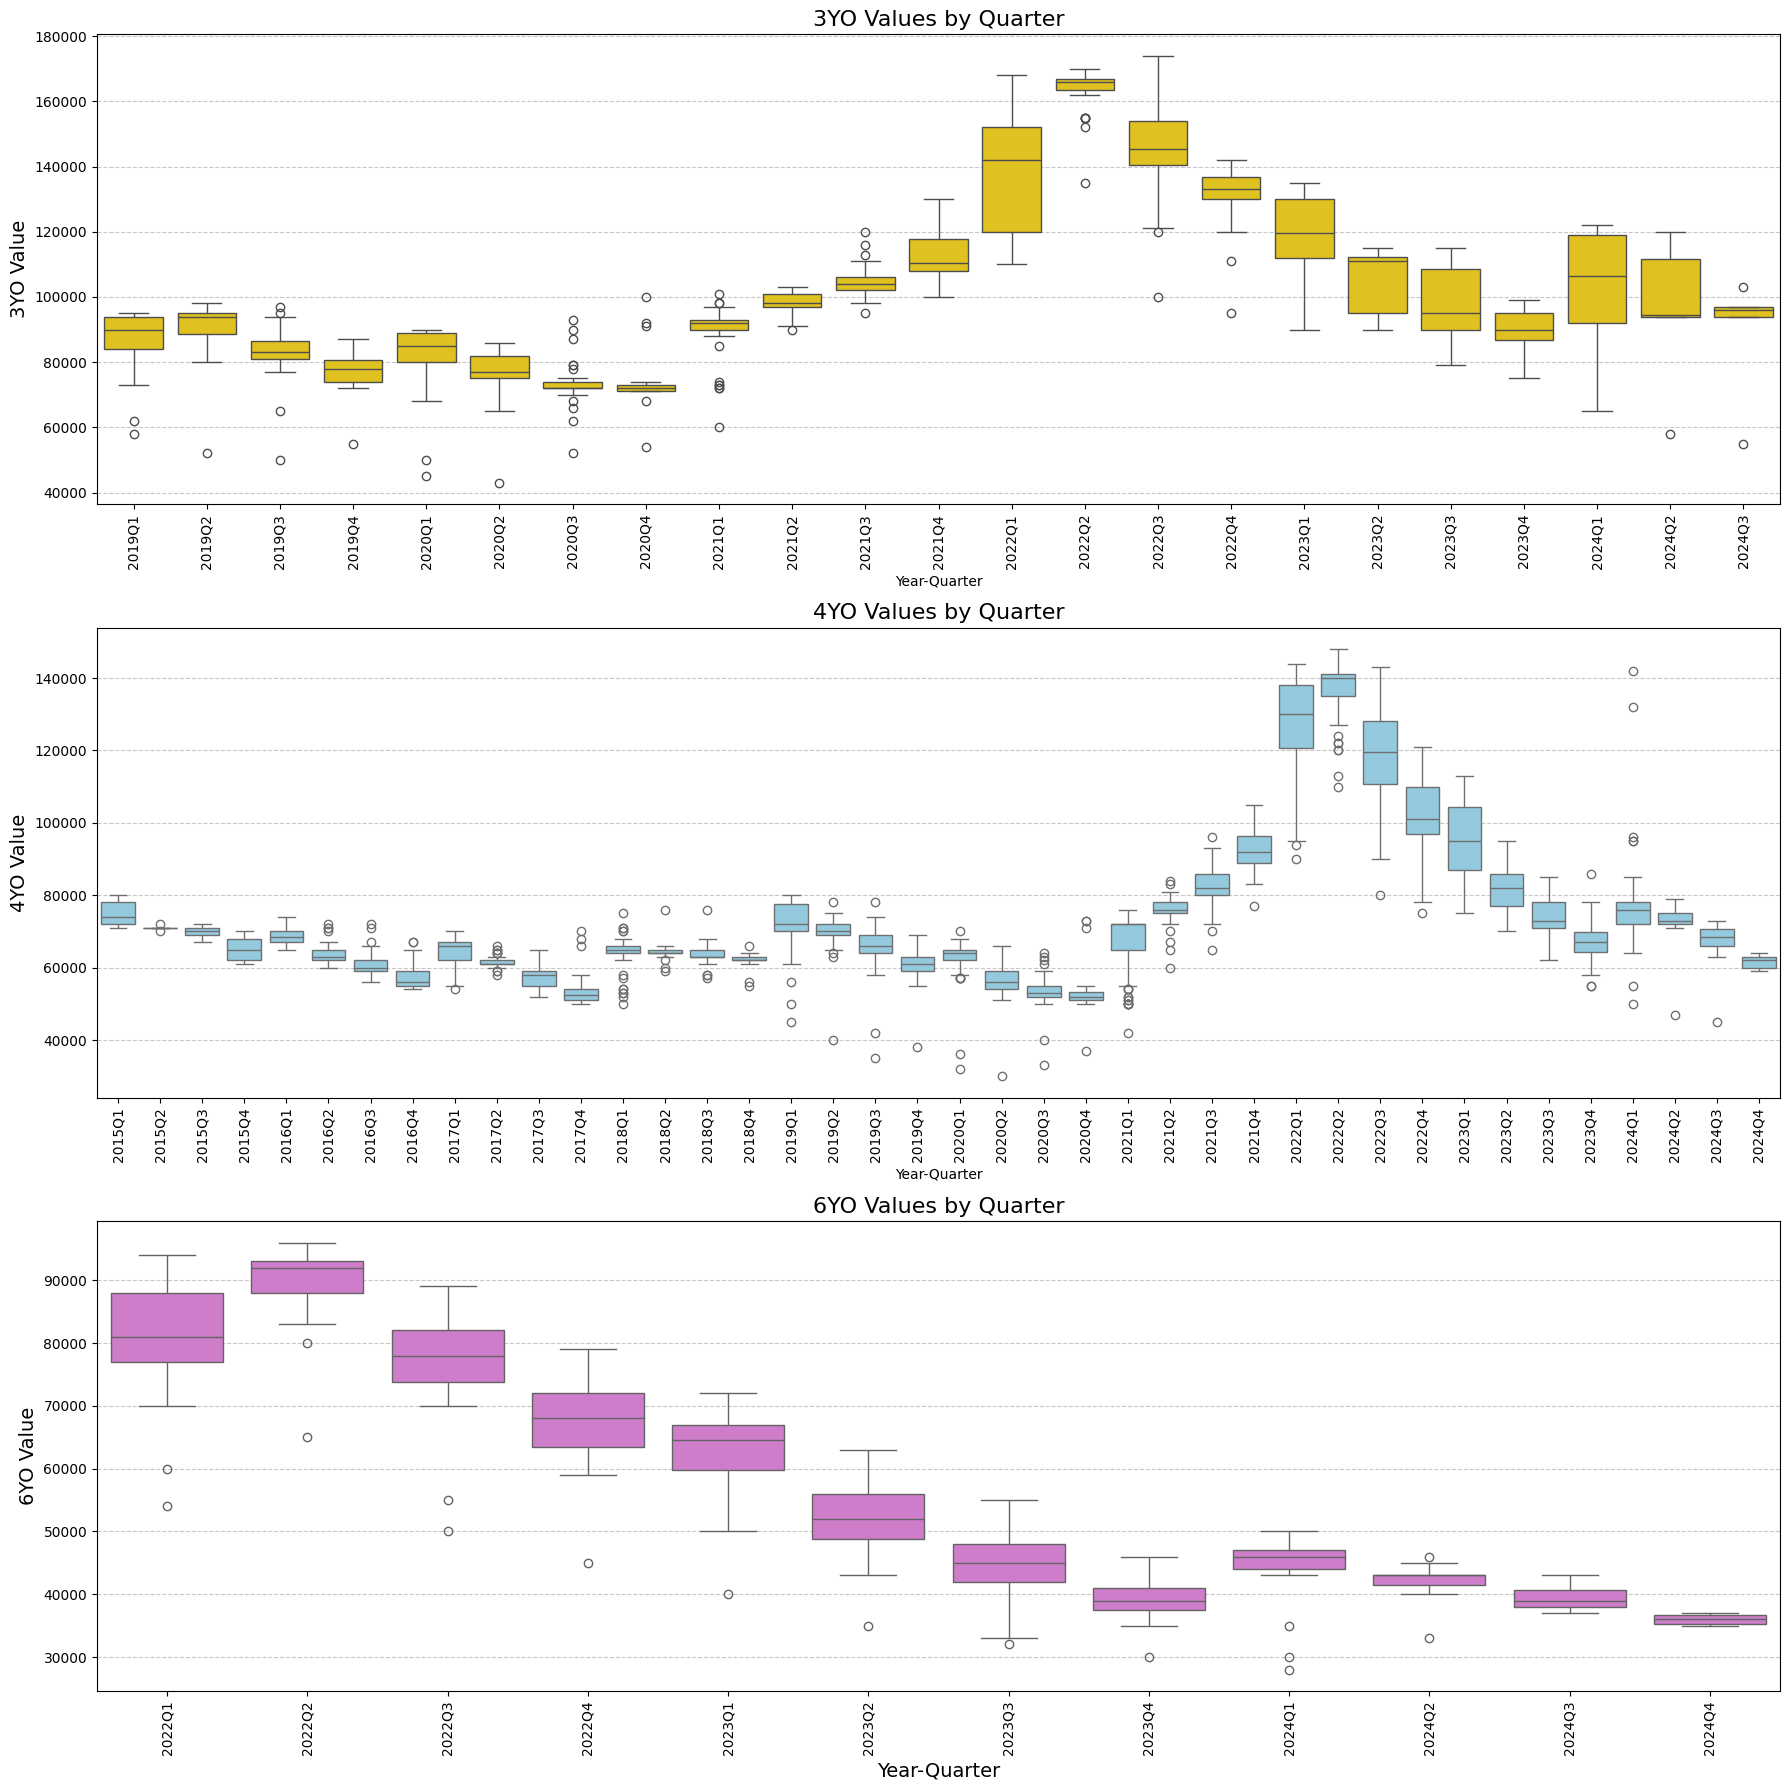

In [93]:
# Create separate time series box plots for all three age groups
fig, axes = plt.subplots(3, 1, figsize=(18, 18), sharex=False)

# 3YO time series
sns.boxplot(x='Year-Quarter', y='Value', data=melted_3yo, ax=axes[0], color=colors['3YO'])
axes[0].set_title('3YO Values by Quarter', fontsize=16)
axes[0].set_ylabel('3YO Value', fontsize=14)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
axes[0].tick_params(axis='x', rotation=90)

# 4YO time series
sns.boxplot(x='Year-Quarter', y='Value', data=melted_4yo, ax=axes[1], color=colors['4YO'])
axes[1].set_title('4YO Values by Quarter', fontsize=16)
axes[1].set_ylabel('4YO Value', fontsize=14)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
axes[1].tick_params(axis='x', rotation=90)

# 6YO time series
sns.boxplot(x='Year-Quarter', y='Value', data=melted_6yo, ax=axes[2], color=colors['6YO'])
axes[2].set_title('6YO Values by Quarter', fontsize=16)
axes[2].set_xlabel('Year-Quarter', fontsize=14)
axes[2].set_ylabel('6YO Value', fontsize=14)
axes[2].grid(axis='y', linestyle='--', alpha=0.7)
axes[2].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

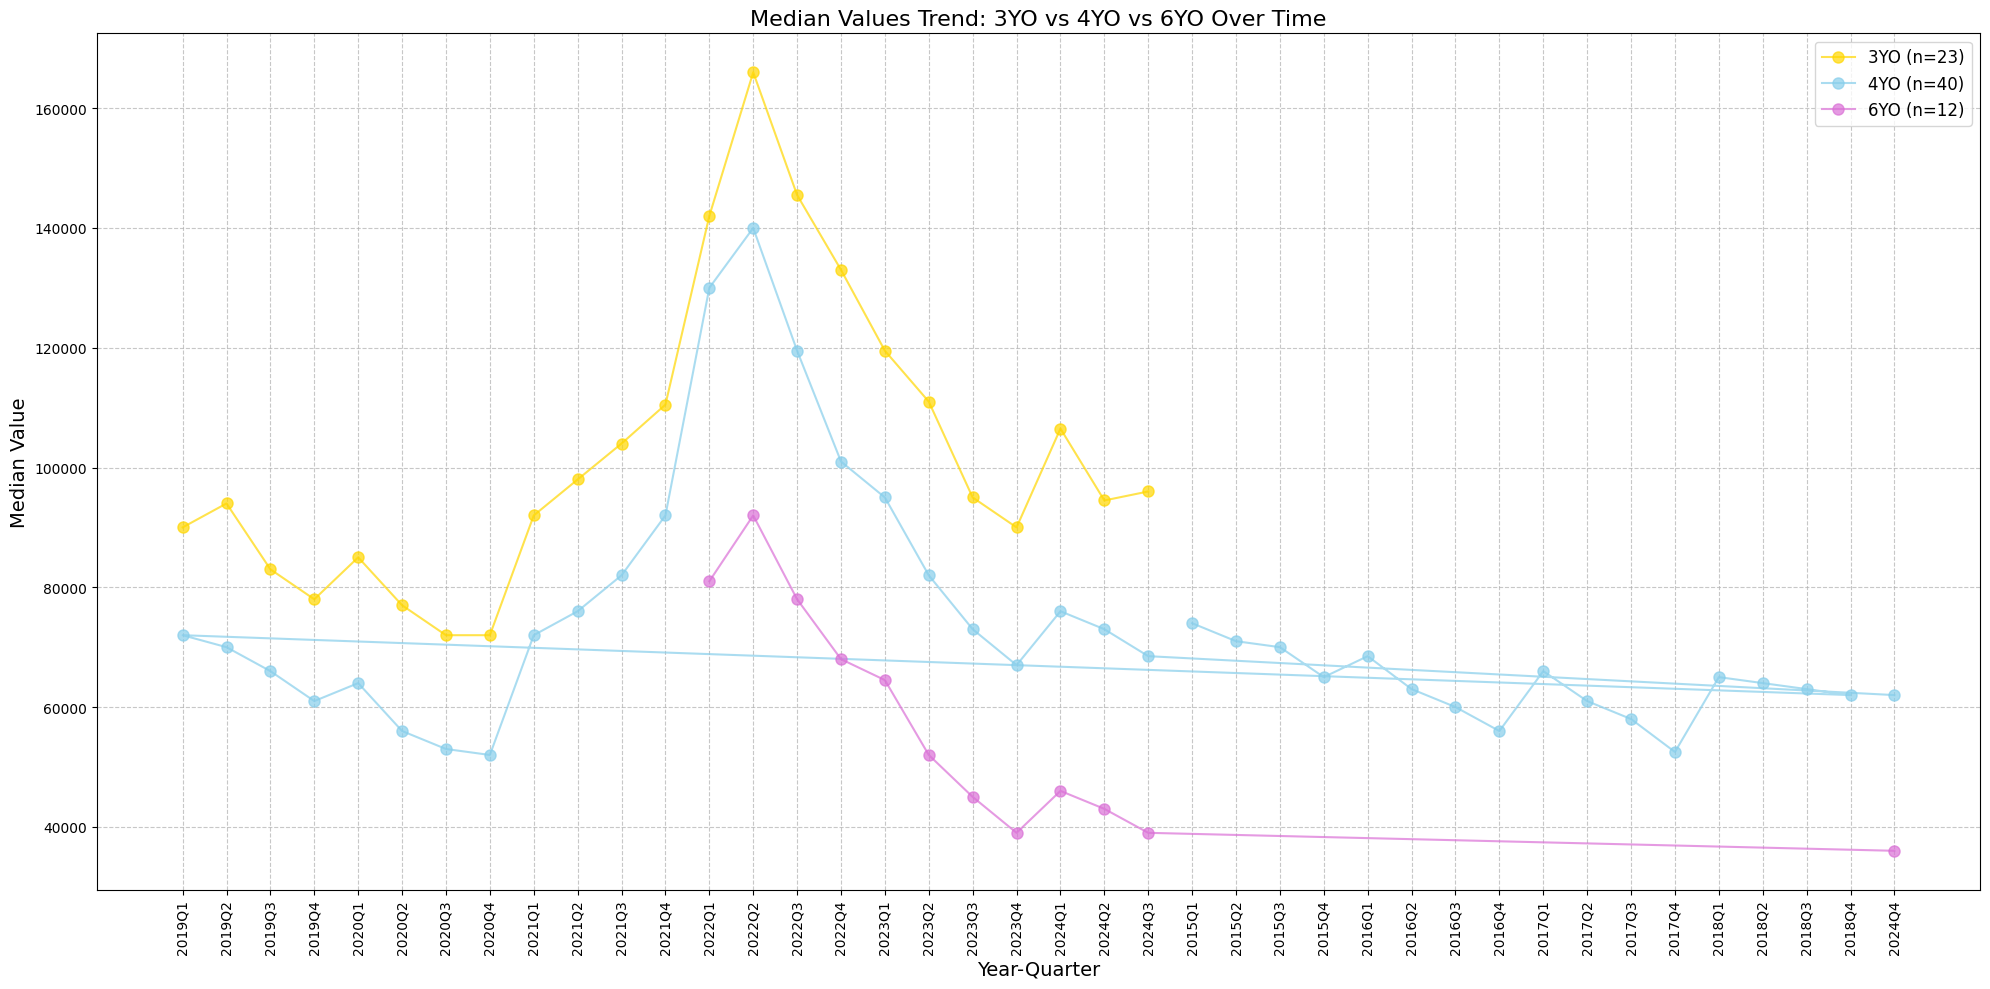

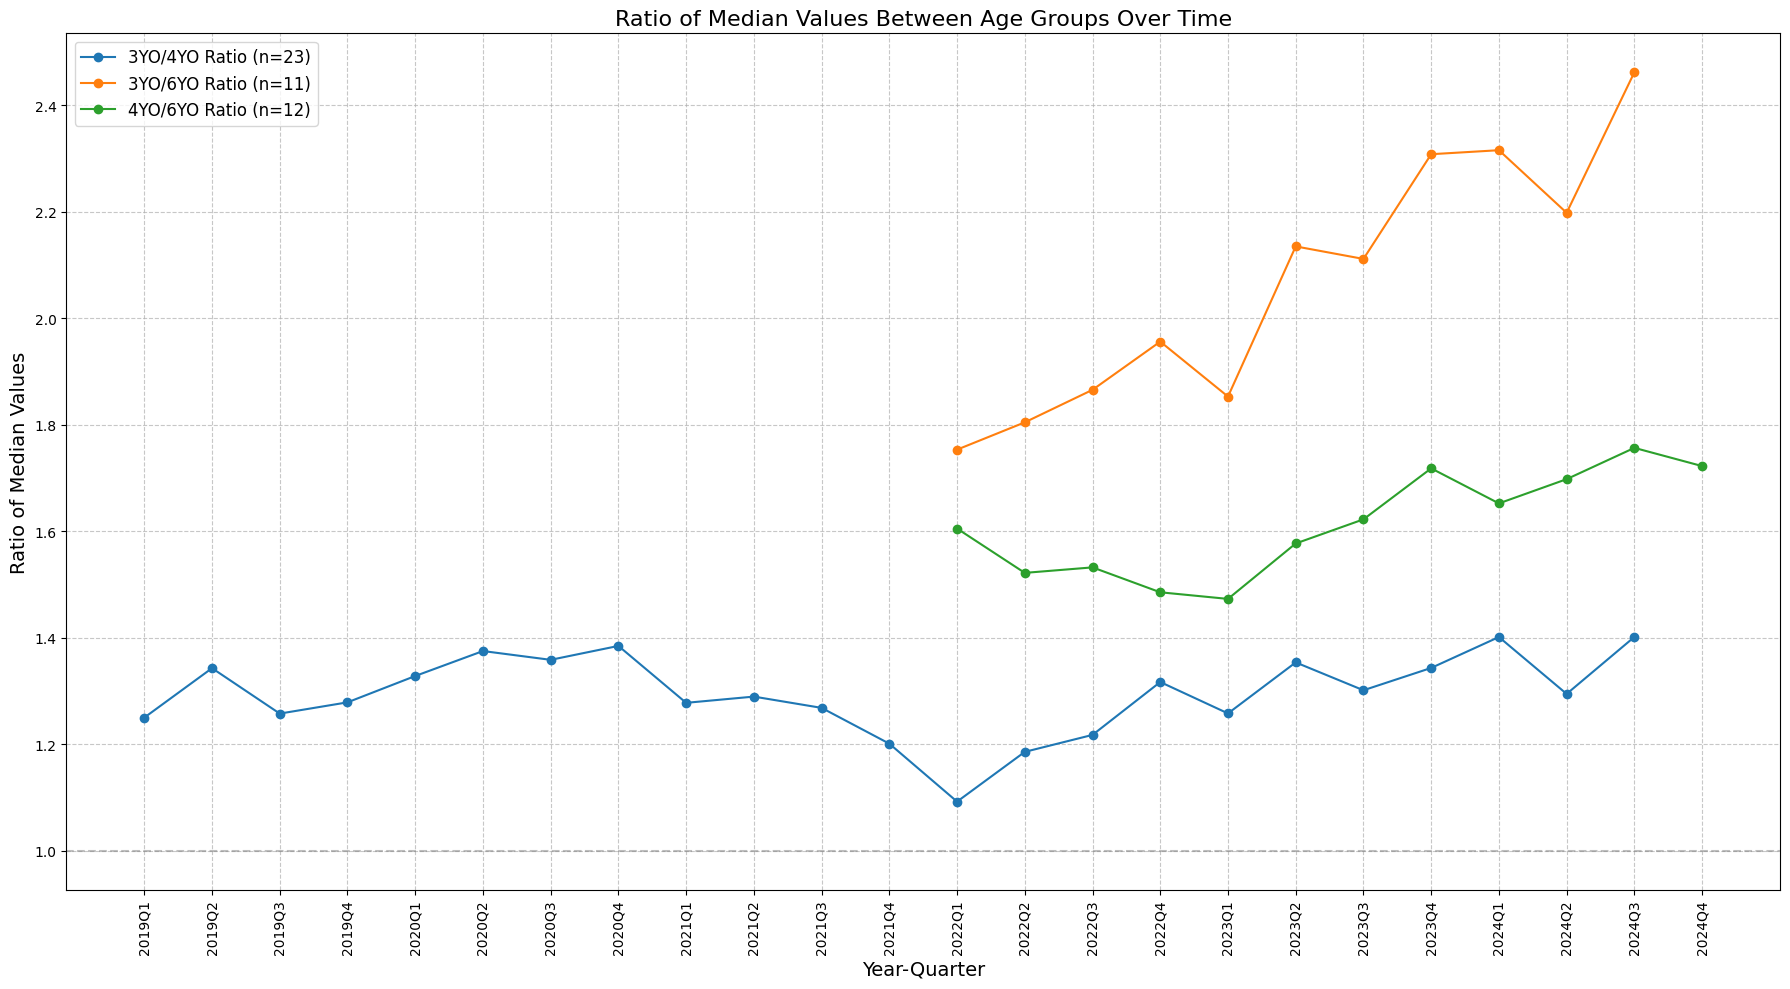

In [94]:
# Calculate quarterly median values for trend analysis across all age groups
quarterly_stats_6yo = melted_6yo.groupby('Year-Quarter')['Value'].agg(['median', lambda x: x.quantile(0.75) - x.quantile(0.25)])
quarterly_stats_6yo.rename(columns={'<lambda_0>': 'IQR'}, inplace=True)
quarterly_stats_6yo['Age_Group'] = '6YO'
quarterly_stats_6yo = quarterly_stats_6yo.reset_index()

# Combine all three age groups' statistics
combined_stats_all = pd.concat([quarterly_stats_3yo, quarterly_stats_4yo, quarterly_stats_6yo], ignore_index=True)

# Create a trend plot of medians for all three age groups
plt.figure(figsize=(20, 10))

for age_group, color in [('3YO', colors['3YO']), ('4YO', colors['4YO']), ('6YO', colors['6YO'])]:
    group_data = combined_stats_all[combined_stats_all['Age_Group'] == age_group]
    if not group_data.empty:
        plt.plot(
            group_data['Year-Quarter'], 
            group_data['median'],
            'o-',
            label=f"{age_group} (n={len(group_data)})",
            color=color,
            alpha=0.7,
            markersize=8
        )

plt.title('Median Values Trend: 3YO vs 4YO vs 6YO Over Time', fontsize=16)
plt.xlabel('Year-Quarter', fontsize=14)
plt.ylabel('Median Value', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Calculate the ratio between age groups where data exists for both
# This helps analyze the relative changes between age groups
common_quarters_pairs = {
    '3YO_to_4YO': sorted(set(quarterly_stats_3yo['Year-Quarter']) & set(quarterly_stats_4yo['Year-Quarter'])),
    '3YO_to_6YO': sorted(set(quarterly_stats_3yo['Year-Quarter']) & set(quarterly_stats_6yo['Year-Quarter'])),
    '4YO_to_6YO': sorted(set(quarterly_stats_4yo['Year-Quarter']) & set(quarterly_stats_6yo['Year-Quarter']))
}

# Create a plot of the ratios
plt.figure(figsize=(18, 10))

# For each pair with common data, calculate and plot ratios
for pair, quarters in common_quarters_pairs.items():
    if len(quarters) > 0:
        # Extract the age groups from the pair key
        group1, group2 = pair.split('_to_')
        
        # Container for the ratios
        ratios = []
        quarters_with_data = []
        
        # Calculate ratio for each common quarter
        for quarter in quarters:
            median1 = combined_stats_all[(combined_stats_all['Year-Quarter'] == quarter) & 
                                      (combined_stats_all['Age_Group'] == group1)]['median'].values
            
            median2 = combined_stats_all[(combined_stats_all['Year-Quarter'] == quarter) & 
                                      (combined_stats_all['Age_Group'] == group2)]['median'].values
            
            if len(median1) > 0 and len(median2) > 0:
                ratio = median1[0] / median2[0] if median2[0] != 0 else float('nan')
                ratios.append(ratio)
                quarters_with_data.append(quarter)
        
        # Plot the ratio
        if ratios:
            plt.plot(quarters_with_data, ratios, 'o-', 
                     label=f"{group1}/{group2} Ratio (n={len(ratios)})")

plt.axhline(y=1, color='gray', linestyle='--', alpha=0.5)
plt.title('Ratio of Median Values Between Age Groups Over Time', fontsize=16)
plt.xlabel('Year-Quarter', fontsize=14)
plt.ylabel('Ratio of Median Values', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [95]:
# Statistical comparison between age groups for common quarters
if common_quarters_all:
    print("Statistical comparison between 3YO, 4YO, and 6YO values by quarter:")
    print("-" * 100)
    
    for quarter in common_quarters_all:
        values_3yo = data_3yo[data_3yo['Year-Quarter'] == quarter]['3YO']
        values_4yo = data_4yo[data_4yo['Year-Quarter'] == quarter]['4YO']
        values_6yo = data_6yo[data_6yo['Year-Quarter'] == quarter]['6YO']
        
        # Ensure we have enough data points for a meaningful test
        if len(values_3yo) >= 3 and len(values_4yo) >= 3 and len(values_6yo) >= 3:
            # Perform Kruskal-Wallis H-test (non-parametric alternative to one-way ANOVA)
            h_stat, p_value = stats.kruskal(values_3yo, values_4yo, values_6yo)
            
            # Print the results
            print(f"Quarter: {quarter}")
            print(f"  3YO: n={len(values_3yo)}, median={values_3yo.median():.2f}, mean={values_3yo.mean():.2f}, std={values_3yo.std():.2f}")
            print(f"  4YO: n={len(values_4yo)}, median={values_4yo.median():.2f}, mean={values_4yo.mean():.2f}, std={values_4yo.std():.2f}")
            print(f"  6YO: n={len(values_6yo)}, median={values_6yo.median():.2f}, mean={values_6yo.mean():.2f}, std={values_6yo.std():.2f}")
            print(f"  Kruskal-Wallis H-test: H={h_stat:.2f}, p-value={p_value:.6f}")
            print(f"  Interpretation: {'Significant difference' if p_value < 0.05 else 'No significant difference'} among the three age groups")
            
            # If overall significant difference found, perform pairwise tests
            if p_value < 0.05:
                print("  Pairwise comparisons (Mann-Whitney U tests):")
                # 3YO vs 4YO
                u_3v4, p_3v4 = stats.mannwhitneyu(values_3yo, values_4yo, alternative='two-sided')
                print(f"    3YO vs 4YO: U={u_3v4:.2f}, p-value={p_3v4:.6f}, {'Significant' if p_3v4 < 0.05 else 'Not significant'}")
                
                # 3YO vs 6YO
                u_3v6, p_3v6 = stats.mannwhitneyu(values_3yo, values_6yo, alternative='two-sided')
                print(f"    3YO vs 6YO: U={u_3v6:.2f}, p-value={p_3v6:.6f}, {'Significant' if p_3v6 < 0.05 else 'Not significant'}")
                
                # 4YO vs 6YO
                u_4v6, p_4v6 = stats.mannwhitneyu(values_4yo, values_6yo, alternative='two-sided')
                print(f"    4YO vs 6YO: U={u_4v6:.2f}, p-value={p_4v6:.6f}, {'Significant' if p_4v6 < 0.05 else 'Not significant'}")
            
            print("-" * 100)
        else:
            print(f"Quarter {quarter}: Insufficient data for statistical comparison")
else:
    print("No common quarters available for statistical comparison of all three age groups.")
    
    # Analyze the relationship between values of different age groups where data exists
    # This helps understand how the values for different age groups correlate with each other
    print("\nAnalyzing relationships between age groups where data exists:")
    
    # Find data points where we have both 3YO and 4YO
    both_3yo_4yo = data.dropna(subset=['3YO', '4YO']).copy()
    
    if len(both_3yo_4yo) > 0:
        corr_3yo_4yo = both_3yo_4yo['3YO'].corr(both_3yo_4yo['4YO'])
        print(f"Correlation between 3YO and 4YO (n={len(both_3yo_4yo)}): {corr_3yo_4yo:.4f}")
        
        plt.figure(figsize=(10, 8))
        plt.scatter(both_3yo_4yo['4YO'], both_3yo_4yo['3YO'], alpha=0.5)
        plt.title('Relationship between 3YO and 4YO Values', fontsize=16)
        plt.xlabel('4YO Value', fontsize=14)
        plt.ylabel('3YO Value', fontsize=14)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
    
    # Find data points where we have both 3YO and 6YO
    both_3yo_6yo = data.dropna(subset=['3YO', '6YO']).copy()
    
    if len(both_3yo_6yo) > 0:
        corr_3yo_6yo = both_3yo_6yo['3YO'].corr(both_3yo_6yo['6YO'])
        print(f"Correlation between 3YO and 6YO (n={len(both_3yo_6yo)}): {corr_3yo_6yo:.4f}")
        
        plt.figure(figsize=(10, 8))
        plt.scatter(both_3yo_6yo['6YO'], both_3yo_6yo['3YO'], alpha=0.5)
        plt.title('Relationship between 3YO and 6YO Values', fontsize=16)
        plt.xlabel('6YO Value', fontsize=14)
        plt.ylabel('3YO Value', fontsize=14)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
    
    # Find data points where we have both 4YO and 6YO
    both_4yo_6yo = data.dropna(subset=['4YO', '6YO']).copy()
    
    if len(both_4yo_6yo) > 0:
        corr_4yo_6yo = both_4yo_6yo['4YO'].corr(both_4yo_6yo['6YO'])
        print(f"Correlation between 4YO and 6YO (n={len(both_4yo_6yo)}): {corr_4yo_6yo:.4f}")
        
        plt.figure(figsize=(10, 8))
        plt.scatter(both_4yo_6yo['6YO'], both_4yo_6yo['4YO'], alpha=0.5)
        plt.title('Relationship between 4YO and 6YO Values', fontsize=16)
        plt.xlabel('6YO Value', fontsize=14)
        plt.ylabel('4YO Value', fontsize=14)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

Statistical comparison between 3YO, 4YO, and 6YO values by quarter:
----------------------------------------------------------------------------------------------------
Quarter: 2022Q1
  3YO: n=61, median=142000.00, mean=138524.59, std=17864.87
  4YO: n=104, median=130000.00, mean=125278.85, std=14291.32
  6YO: n=44, median=81000.00, mean=81204.55, std=8091.28
  Kruskal-Wallis H-test: H=113.17, p-value=0.000000
  Interpretation: Significant difference among the three age groups
  Pairwise comparisons (Mann-Whitney U tests):
    3YO vs 4YO: U=4334.50, p-value=0.000085, Significant
    3YO vs 6YO: U=2684.00, p-value=0.000000, Significant
    4YO vs 6YO: U=4568.50, p-value=0.000000, Significant
----------------------------------------------------------------------------------------------------
Quarter: 2022Q2
  3YO: n=27, median=166000.00, mean=163222.22, std=7576.96
  4YO: n=69, median=140000.00, mean=136666.67, std=7391.70
  6YO: n=43, median=92000.00, mean=90232.56, std=5326.65
  Krusk

# Comprehensive Analysis: 3YO vs 4YO vs 5YO vs 6YO

This section provides a comprehensive comparison of all four age groups (3YO, 4YO, 5YO, and 6YO) to analyze trends and differences across the complete lifecycle.

In [96]:
# Prepare data for all four age groups comparison
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

# Create dataframe for 5YO (which we haven't processed in previous cells)
data_5yo = data.dropna(subset=['5YO']).copy()

# Count data points per quarter for 5YO
quarter_counts_5yo = data_5yo.groupby('Year-Quarter')['5YO'].count()
valid_quarters_5yo = quarter_counts_5yo[quarter_counts_5yo >= 3].index.tolist()

print(f"Quarters with at least 3 data points for 5YO: {len(valid_quarters_5yo)}")

# Filter data for valid quarters
data_5yo_filtered = data_5yo[data_5yo['Year-Quarter'].isin(valid_quarters_5yo)]

# Create melted dataframe for 5YO
melted_5yo = data_5yo_filtered[['Year-Quarter', '5YO']].copy()
melted_5yo['Age_Group'] = '5YO'
melted_5yo.rename(columns={'5YO': 'Value'}, inplace=True)

# Combine all four age groups
combined_melted_all = pd.concat([melted_3yo, melted_4yo, melted_5yo, melted_6yo], ignore_index=True)

# Print the shape of our combined data
print(f"Combined data shape for all four age groups: {combined_melted_all.shape}")
print(f"Number of data points per age group:")
print(combined_melted_all['Age_Group'].value_counts())

Quarters with at least 3 data points for 5YO: 40
Combined data shape for all four age groups: (6074, 3)
Number of data points per age group:
Age_Group
4YO    2415
5YO    2412
3YO     862
6YO     385
Name: count, dtype: int64


C:\Users\clint\AppData\Local\Temp\ipykernel_44700\4015429852.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Age_Group', y='Value', data=combined_melted_all,


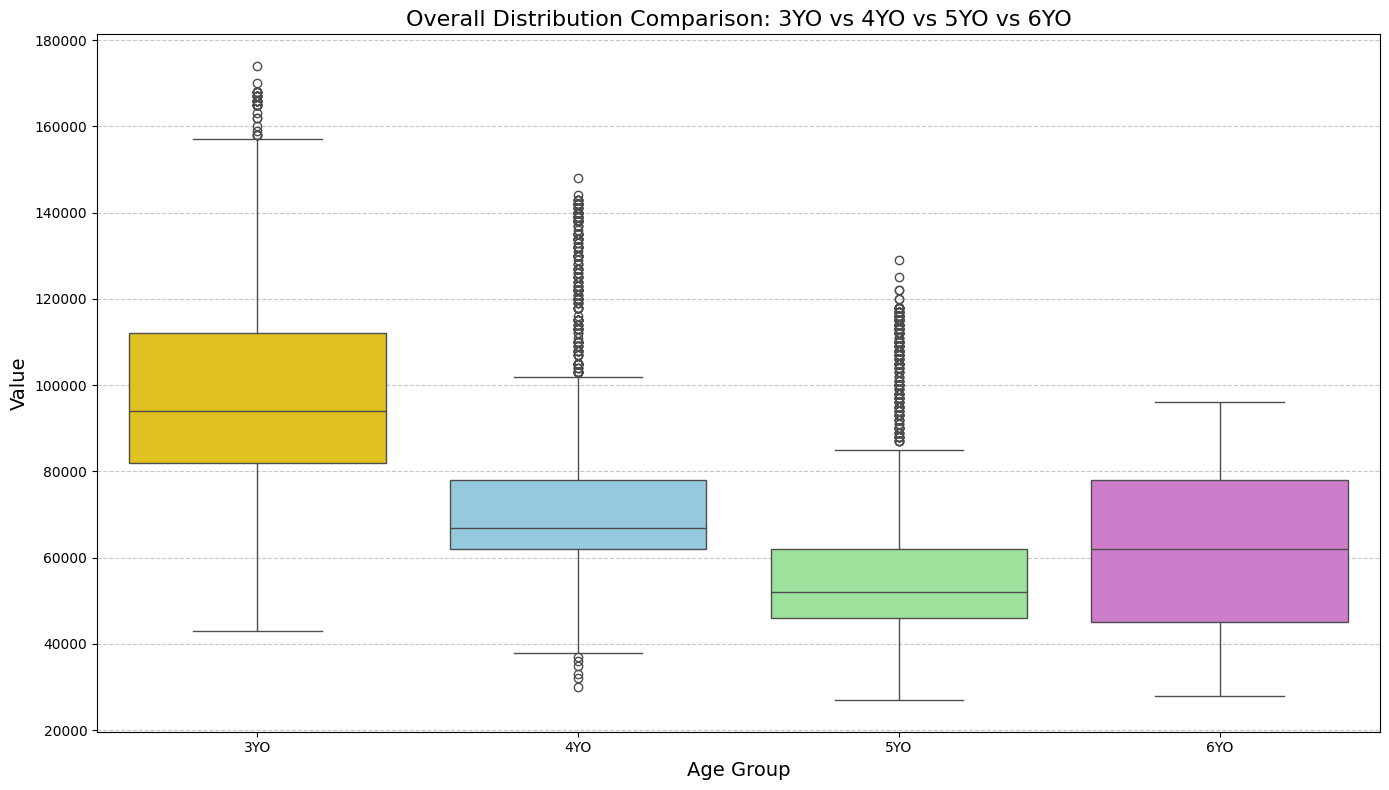

Summary Statistics:
           count           mean   median           std      min       max
Age_Group                                                                
3YO          862  100344.547564  94000.0  26026.714351  43000.0  174000.0
4YO         2415   74607.867495  67000.0  22164.203719  30000.0  148000.0
5YO         2412   58770.315091  52000.0  20286.748351  27000.0  129000.0
6YO          385   62264.935065  62000.0  18452.711001  28000.0   96000.0

One-way ANOVA results comparing all age groups:
F-statistic: 814.0685
p-value: 0.0000000000
Statistically significant difference among the groups: True

Tukey's HSD Post-hoc Test Results:
      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj     lower       upper    reject
---------------------------------------------------------------
   3YO    4YO -25736.6801    0.0 -27962.1903 -23511.1698   True
   3YO    5YO -41574.2325    0.0 -43800.1068 -39348.3582   True
   3YO    6YO -38079.6125  

In [97]:
# Create overall box plots comparing all four age groups
plt.figure(figsize=(14, 8))
sns.boxplot(x='Age_Group', y='Value', data=combined_melted_all, 
            palette={'3YO': colors['3YO'], '4YO': colors['4YO'], '5YO': colors['5YO'], '6YO': colors['6YO']},
            order=['3YO', '4YO', '5YO', '6YO'])

plt.title('Overall Distribution Comparison: 3YO vs 4YO vs 5YO vs 6YO', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Format y-axis to show in thousands
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

# Calculate and print summary statistics
summary_stats_all = combined_melted_all.groupby('Age_Group')['Value'].agg(['count', 'mean', 'median', 'std', 'min', 'max'])
print("Summary Statistics:")
print(summary_stats_all)

# Perform ANOVA to check if there are significant differences among the four groups
groups = [combined_melted_all[combined_melted_all['Age_Group'] == group]['Value'] 
          for group in ['3YO', '4YO', '5YO', '6YO']]
f_stat, p_value = stats.f_oneway(*groups)

print(f"\nOne-way ANOVA results comparing all age groups:")
print(f"F-statistic: {f_stat:.4f}")
print(f"p-value: {p_value:.10f}")
print(f"Statistically significant difference among the groups: {p_value < 0.05}")

# Perform post-hoc tests to identify which specific groups differ
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Prepare data for Tukey's test
tukey_data = combined_melted_all.copy()
tukey_data = tukey_data.dropna(subset=['Value'])

# Perform Tukey's test
tukey = pairwise_tukeyhsd(endog=tukey_data['Value'], groups=tukey_data['Age_Group'], alpha=0.05)
print("\nTukey's HSD Post-hoc Test Results:")
print(tukey)

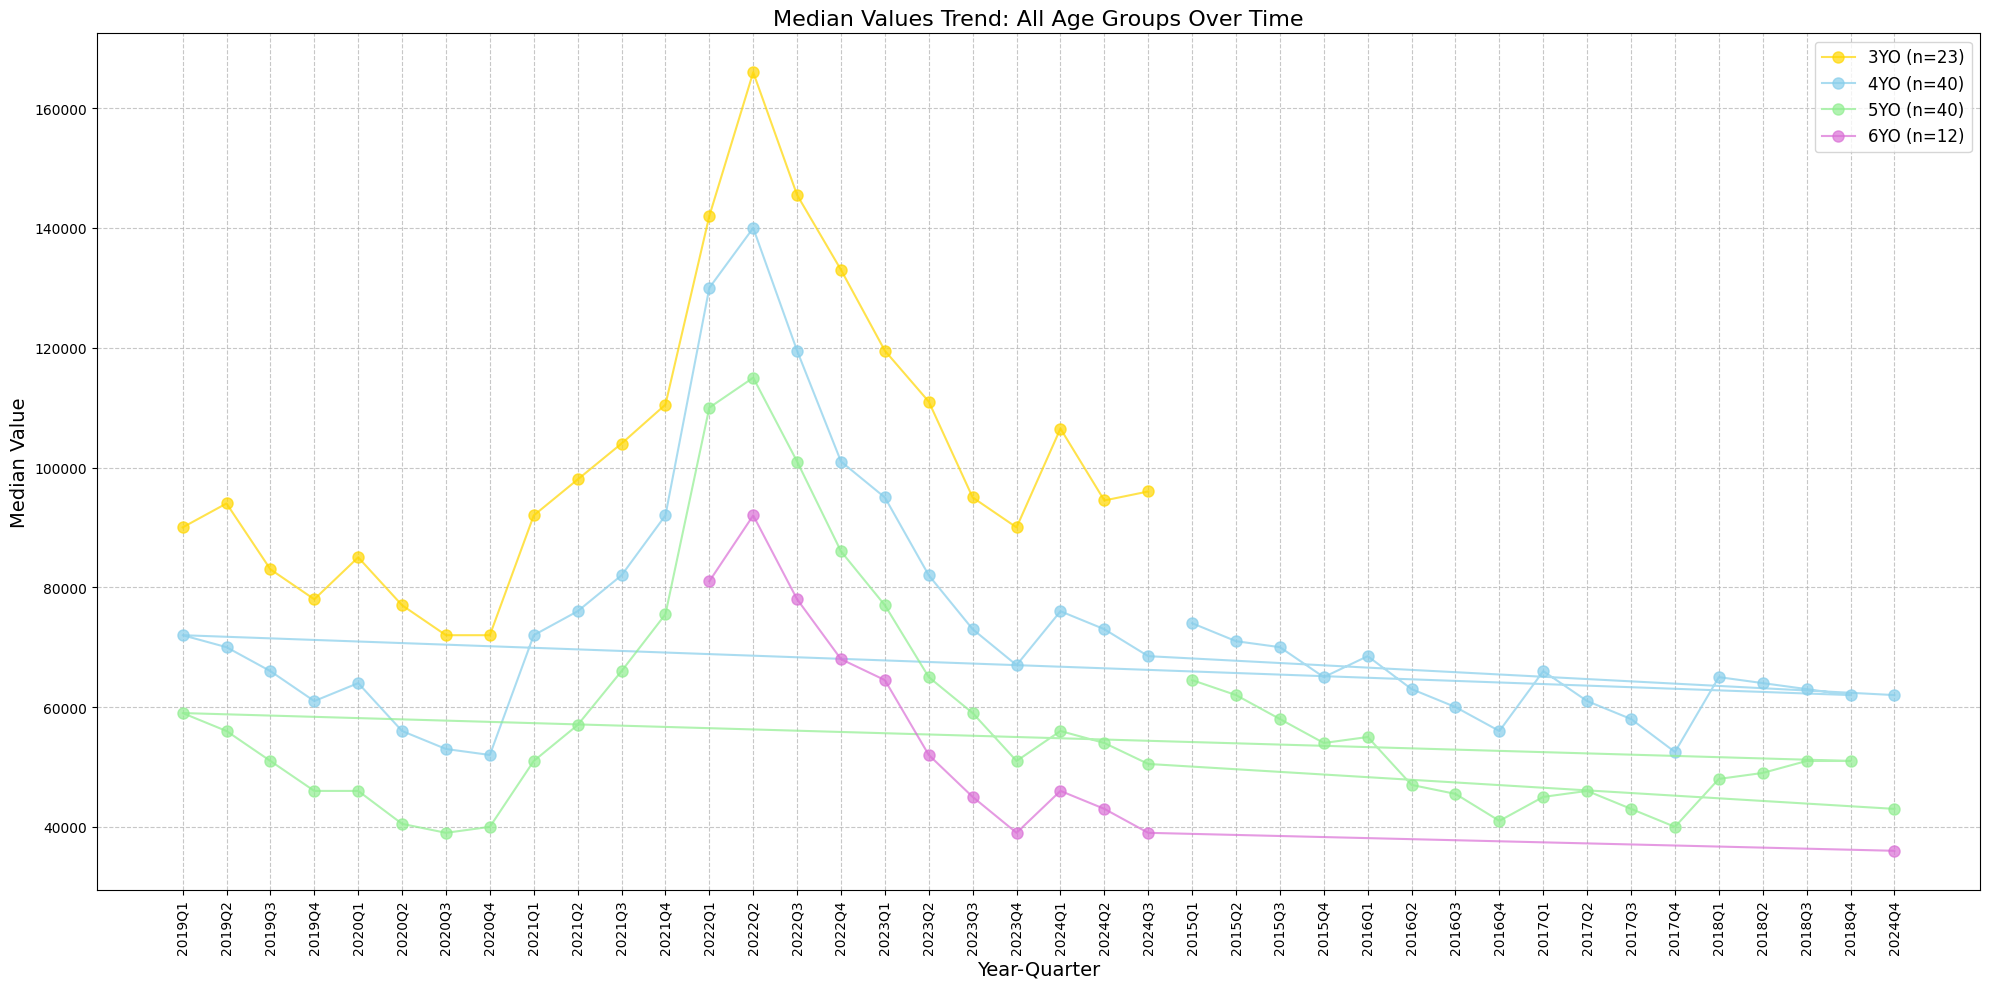

In [98]:
# Create visualizations showing the progression across age groups
# Calculate quarterly statistics for 5YO
quarterly_stats_5yo = melted_5yo.groupby('Year-Quarter')['Value'].agg(['median', lambda x: x.quantile(0.75) - x.quantile(0.25)])
quarterly_stats_5yo.rename(columns={'<lambda_0>': 'IQR'}, inplace=True)
quarterly_stats_5yo['Age_Group'] = '5YO'
quarterly_stats_5yo = quarterly_stats_5yo.reset_index()

# Combine all four age groups' statistics
combined_stats_all = pd.concat([quarterly_stats_3yo, quarterly_stats_4yo, 
                               quarterly_stats_5yo, quarterly_stats_6yo], ignore_index=True)

# Create a trend plot of medians for all four age groups
plt.figure(figsize=(20, 10))

for age_group, color in [('3YO', colors['3YO']), ('4YO', colors['4YO']), 
                         ('5YO', colors['5YO']), ('6YO', colors['6YO'])]:
    group_data = combined_stats_all[combined_stats_all['Age_Group'] == age_group]
    if not group_data.empty:
        plt.plot(
            group_data['Year-Quarter'], 
            group_data['median'],
            'o-',
            label=f"{age_group} (n={len(group_data)})",
            color=color,
            alpha=0.7,
            markersize=8
        )

plt.title('Median Values Trend: All Age Groups Over Time', fontsize=16)
plt.xlabel('Year-Quarter', fontsize=14)
plt.ylabel('Median Value', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Number of quarters with sufficient data for all four age groups: 11
Common quarters: ['2022Q1', '2022Q2', '2022Q3', '2022Q4', '2023Q1', '2023Q2', '2023Q3', '2023Q4', '2024Q1', '2024Q2', '2024Q3']


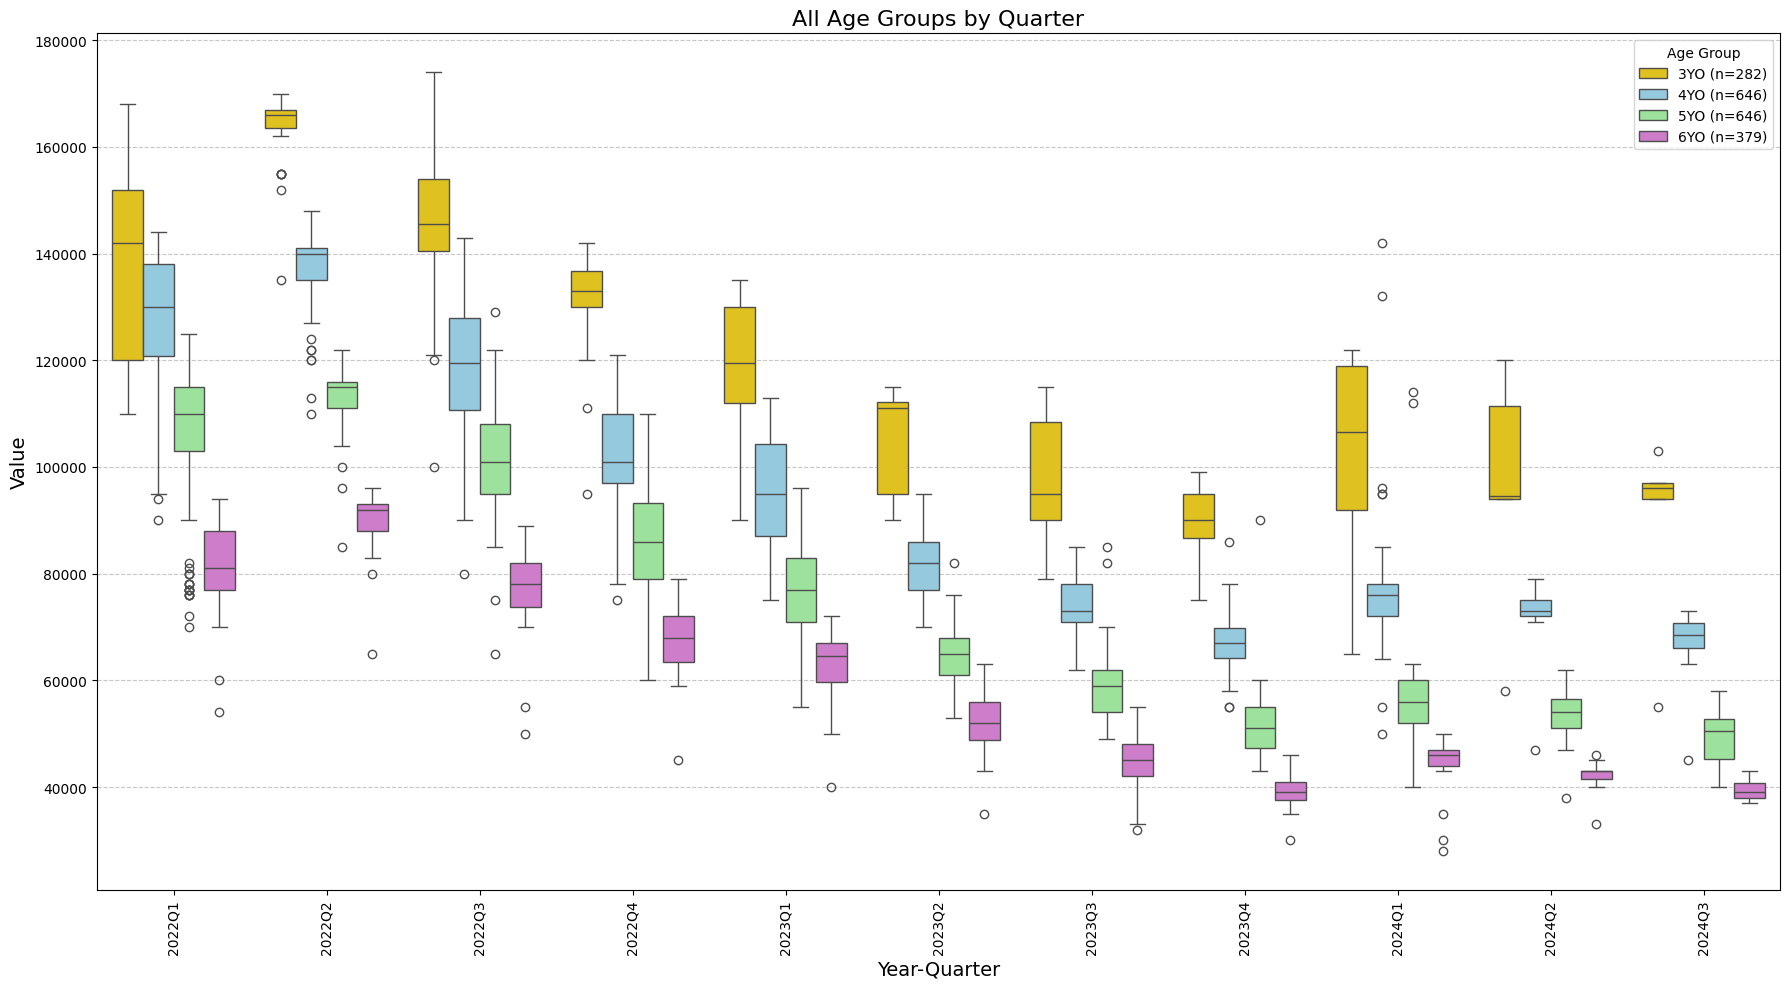

In [99]:
# Find common quarters where we have data for all four age groups
common_quarters_all = sorted(set(valid_quarters_3yo) & 
                             set(valid_quarters_4yo) & 
                             set(valid_quarters_5yo) & 
                             set(valid_quarters_6yo))

print(f"Number of quarters with sufficient data for all four age groups: {len(common_quarters_all)}")
print(f"Common quarters: {common_quarters_all}")

# If we have any common quarters, create comparative boxplots
if common_quarters_all:
    # Filter data for common quarters
    common_data_all = combined_melted_all[combined_melted_all['Year-Quarter'].isin(common_quarters_all)]
    
    # Create boxplots for these quarters
    plt.figure(figsize=(18, 10))
    
    ax = sns.boxplot(x='Year-Quarter', y='Value', hue='Age_Group', 
                    data=common_data_all, 
                    palette=colors,
                    hue_order=['3YO', '4YO', '5YO', '6YO'])
    
    plt.title('All Age Groups by Quarter', fontsize=16)
    plt.xlabel('Year-Quarter', fontsize=14)
    plt.ylabel('Value', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(rotation=90)
    
    # Add data point counts to the legend
    handles, labels = ax.get_legend_handles_labels()
    counts = common_data_all.groupby('Age_Group').size()
    labels = [f"{label} (n={counts[label]})" for label in labels]
    plt.legend(handles, labels, title="Age Group")
    
    plt.tight_layout()
    plt.show()
else:
    print("No common quarters with sufficient data for all four age groups.")
    
    # Try with just the three most recent age groups (4YO, 5YO, 6YO)
    common_quarters_456 = sorted(set(valid_quarters_4yo) & 
                               set(valid_quarters_5yo) & 
                               set(valid_quarters_6yo))
    
    print(f"Quarters with data for 4YO, 5YO, and 6YO: {len(common_quarters_456)}")
    
    if common_quarters_456:
        # Filter for these three age groups
        common_data_456 = combined_melted_all[
            (combined_melted_all['Year-Quarter'].isin(common_quarters_456)) & 
            (combined_melted_all['Age_Group'].isin(['4YO', '5YO', '6YO']))
        ]
        
        # Create boxplots for these quarters
        plt.figure(figsize=(18, 10))
        
        ax = sns.boxplot(x='Year-Quarter', y='Value', hue='Age_Group', 
                        data=common_data_456, 
                        palette={'4YO': colors['4YO'], '5YO': colors['5YO'], '6YO': colors['6YO']},
                        hue_order=['4YO', '5YO', '6YO'])
        
        plt.title('4YO vs 5YO vs 6YO Values by Quarter', fontsize=16)
        plt.xlabel('Year-Quarter', fontsize=14)
        plt.ylabel('Value', fontsize=14)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.xticks(rotation=90)
        
        # Add data point counts to the legend
        handles, labels = ax.get_legend_handles_labels()
        counts = common_data_456.groupby('Age_Group').size()
        labels = [f"{label} (n={counts[label]})" for label in labels]
        plt.legend(handles, labels, title="Age Group")
        
        plt.tight_layout()
        plt.show()

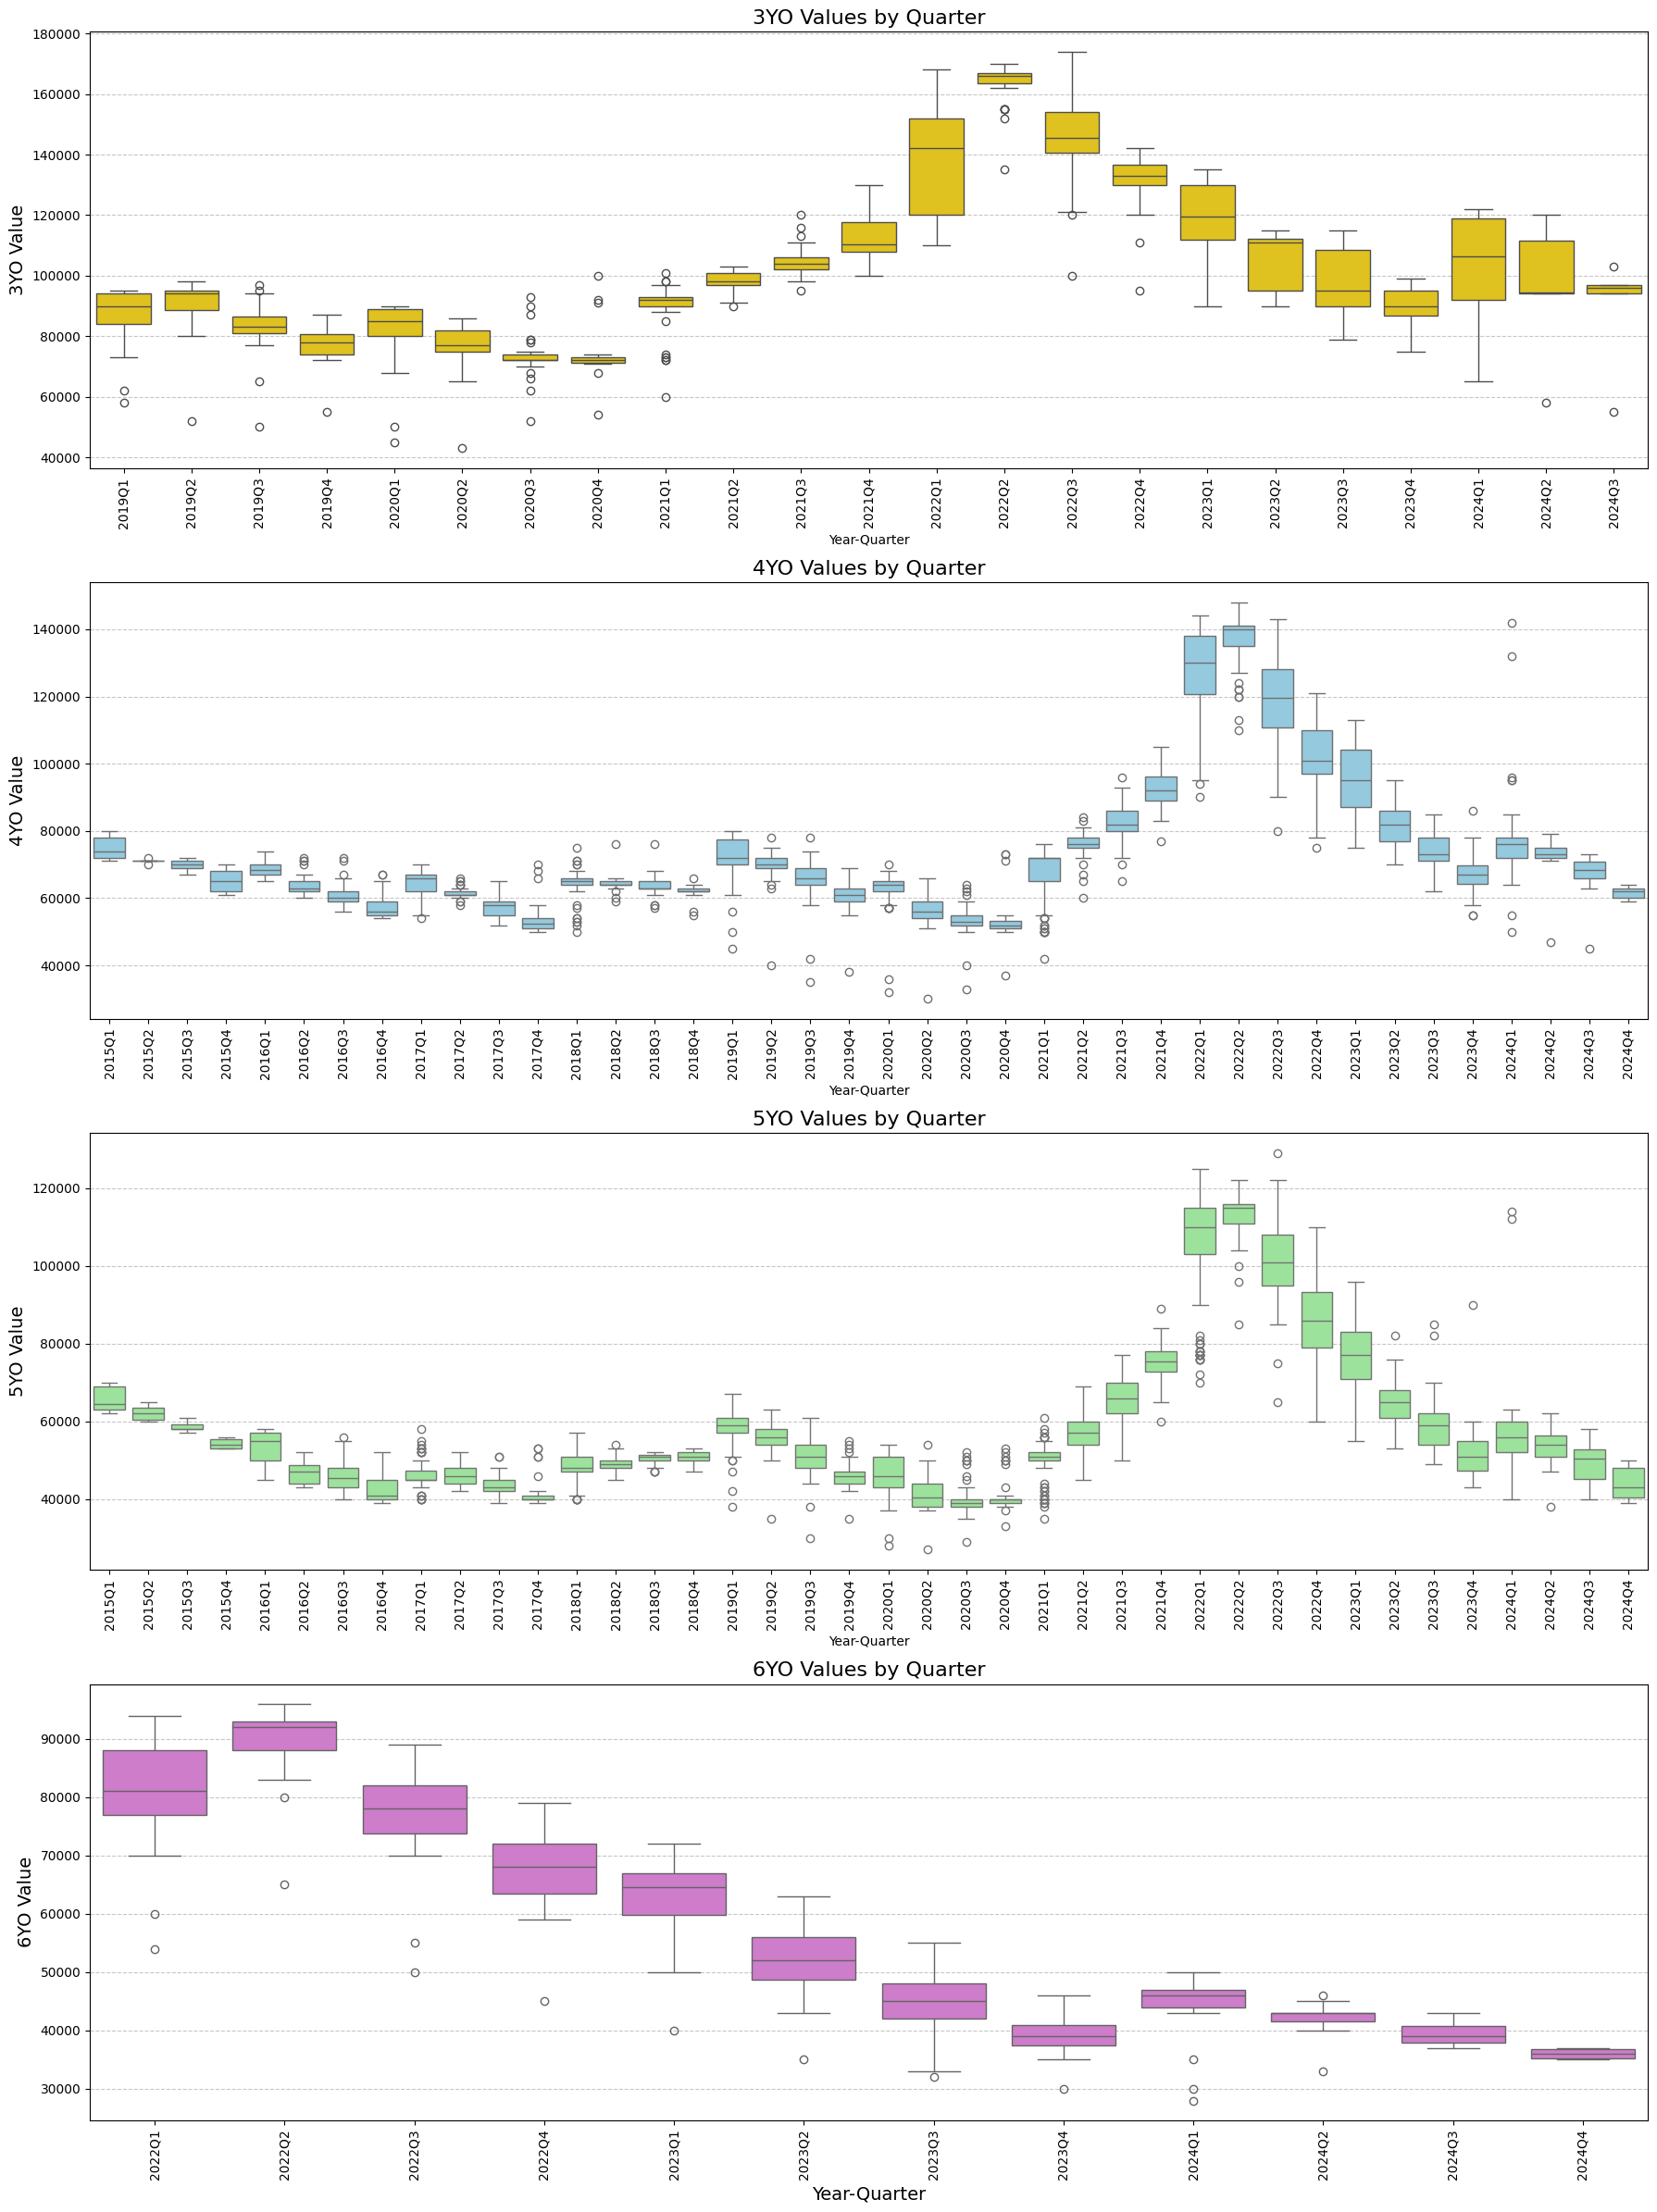

In [100]:
# Create four separate time series box plots for each age group
fig, axes = plt.subplots(4, 1, figsize=(18, 24), sharex=False)

# 3YO time series
sns.boxplot(x='Year-Quarter', y='Value', data=melted_3yo, ax=axes[0], color=colors['3YO'])
axes[0].set_title('3YO Values by Quarter', fontsize=16)
axes[0].set_ylabel('3YO Value', fontsize=14)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
axes[0].tick_params(axis='x', rotation=90)

# 4YO time series
sns.boxplot(x='Year-Quarter', y='Value', data=melted_4yo, ax=axes[1], color=colors['4YO'])
axes[1].set_title('4YO Values by Quarter', fontsize=16)
axes[1].set_ylabel('4YO Value', fontsize=14)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
axes[1].tick_params(axis='x', rotation=90)

# 5YO time series
sns.boxplot(x='Year-Quarter', y='Value', data=melted_5yo, ax=axes[2], color=colors['5YO'])
axes[2].set_title('5YO Values by Quarter', fontsize=16)
axes[2].set_ylabel('5YO Value', fontsize=14)
axes[2].grid(axis='y', linestyle='--', alpha=0.7)
axes[2].tick_params(axis='x', rotation=90)

# 6YO time series
sns.boxplot(x='Year-Quarter', y='Value', data=melted_6yo, ax=axes[3], color=colors['6YO'])
axes[3].set_title('6YO Values by Quarter', fontsize=16)
axes[3].set_xlabel('Year-Quarter', fontsize=14)
axes[3].set_ylabel('6YO Value', fontsize=14)
axes[3].grid(axis='y', linestyle='--', alpha=0.7)
axes[3].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

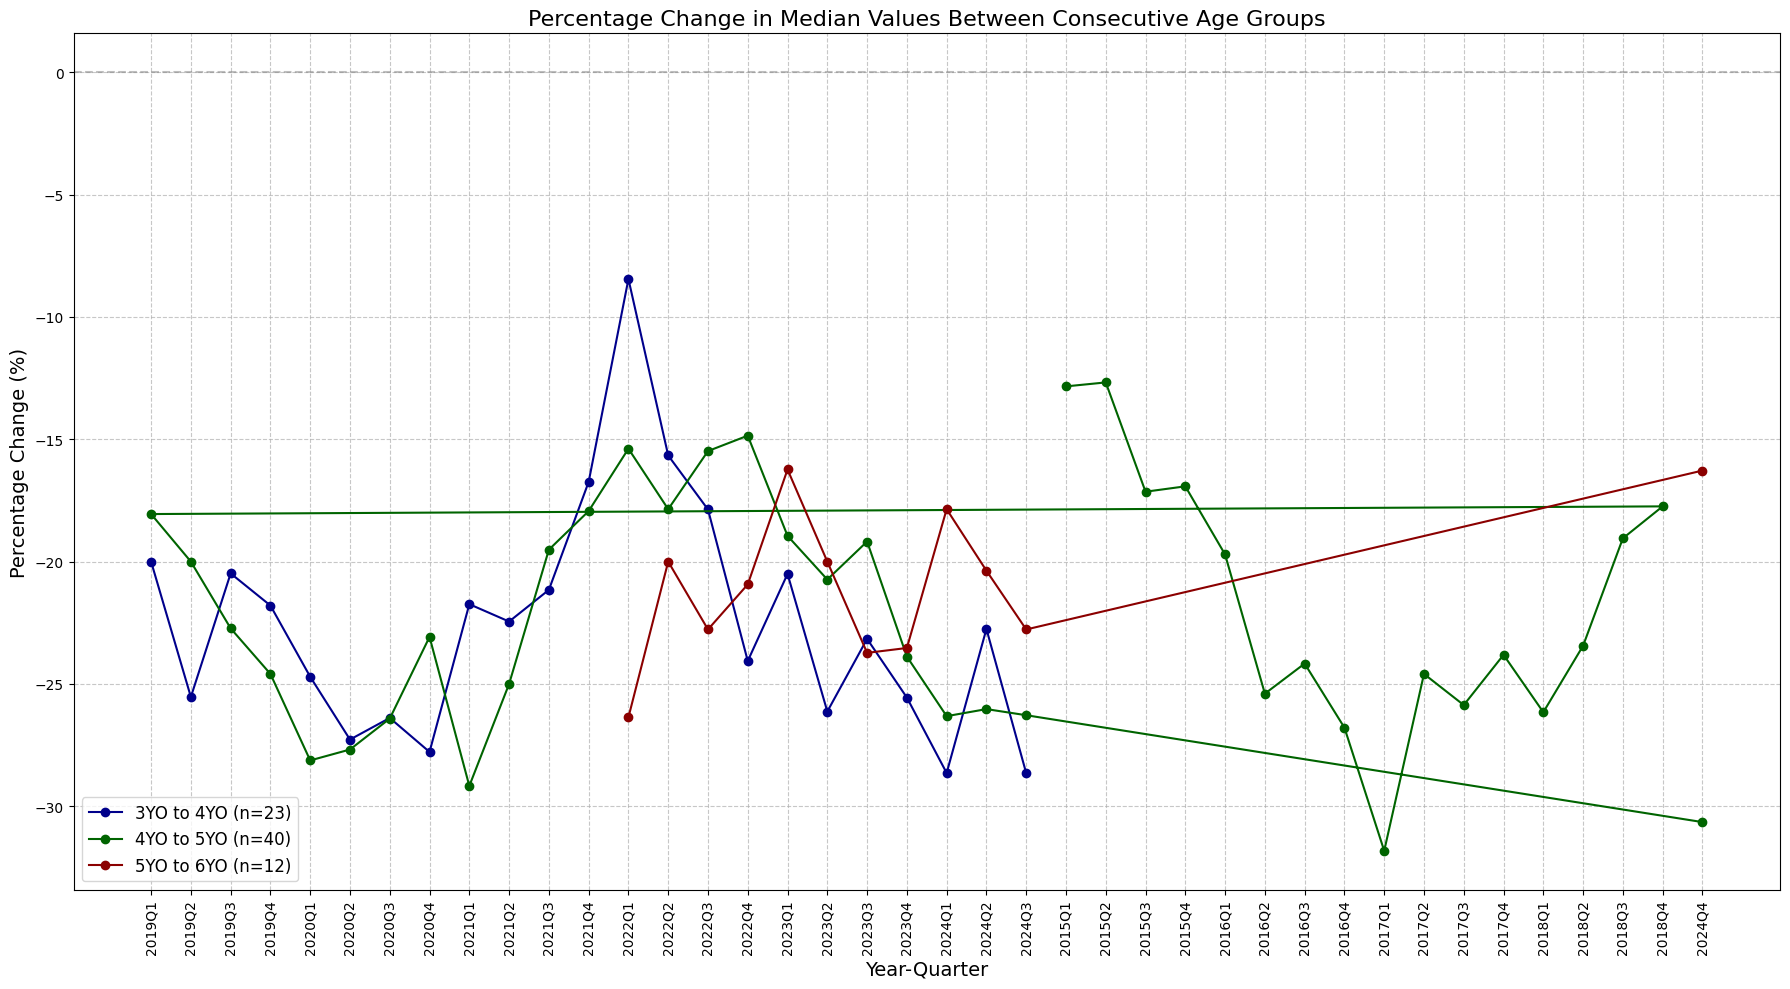

Average Percentage Change Between Age Groups:
                 mean     median       std  count
Transition                                       
3YO_to_4YO -22.498186 -22.751323  4.751155     23
4YO_to_5YO -22.148950 -23.257212  4.899848     40
5YO_to_6YO -20.903083 -20.650301  3.105204     12

Implied Annual Depreciation Rate:
3YO_to_4YO: -22.50% per year
4YO_to_5YO: -22.15% per year
5YO_to_6YO: -20.90% per year


In [101]:
# Calculate the percentage difference between consecutive age groups
# This helps visualize the typical depreciation between age groups

# Find quarters where we have data for adjacent age groups
common_quarters_pairs = {
    '3YO_to_4YO': sorted(set(quarterly_stats_3yo['Year-Quarter']) & set(quarterly_stats_4yo['Year-Quarter'])),
    '4YO_to_5YO': sorted(set(quarterly_stats_4yo['Year-Quarter']) & set(quarterly_stats_5yo['Year-Quarter'])),
    '5YO_to_6YO': sorted(set(quarterly_stats_5yo['Year-Quarter']) & set(quarterly_stats_6yo['Year-Quarter']))
}

# Create a plot of the percentage differences
plt.figure(figsize=(18, 10))

# Define colors for each transition
transition_colors = {
    '3YO_to_4YO': 'darkblue',
    '4YO_to_5YO': 'darkgreen',
    '5YO_to_6YO': 'darkred'
}

# For each pair with common data, calculate and plot percentage differences
all_pct_diffs = []

for pair, quarters in common_quarters_pairs.items():
    if len(quarters) > 0:
        # Extract the age groups from the pair key
        group1, group2 = pair.split('_to_')
        
        # Container for the percentage differences
        pct_diffs = []
        quarters_with_data = []
        
        # Calculate percentage difference for each common quarter
        for quarter in quarters:
            median1 = combined_stats_all[(combined_stats_all['Year-Quarter'] == quarter) & 
                                      (combined_stats_all['Age_Group'] == group1)]['median'].values
            
            median2 = combined_stats_all[(combined_stats_all['Year-Quarter'] == quarter) & 
                                      (combined_stats_all['Age_Group'] == group2)]['median'].values
            
            if len(median1) > 0 and len(median2) > 0:
                # Calculate percentage change from group1 to group2
                pct_diff = ((median2[0] - median1[0]) / median1[0]) * 100 if median1[0] != 0 else float('nan')
                pct_diffs.append(pct_diff)
                quarters_with_data.append(quarter)
                all_pct_diffs.append({'Transition': pair, 'Quarter': quarter, 'Pct_Diff': pct_diff})
        
        # Plot the percentage differences
        if pct_diffs:
            plt.plot(quarters_with_data, pct_diffs, 'o-', 
                     label=f"{group1} to {group2} (n={len(pct_diffs)})",
                     color=transition_colors[pair])

plt.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
plt.title('Percentage Change in Median Values Between Consecutive Age Groups', fontsize=16)
plt.xlabel('Year-Quarter', fontsize=14)
plt.ylabel('Percentage Change (%)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Convert to DataFrame and calculate average depreciation rates
pct_diff_df = pd.DataFrame(all_pct_diffs)
if not pct_diff_df.empty:
    print("Average Percentage Change Between Age Groups:")
    avg_pct_diff = pct_diff_df.groupby('Transition')['Pct_Diff'].agg(['mean', 'median', 'std', 'count'])
    print(avg_pct_diff)
    
    # Calculate average annual depreciation rate
    print("\nImplied Annual Depreciation Rate:")
    for transition in avg_pct_diff.index:
        print(f"{transition}: {avg_pct_diff.loc[transition, 'mean']:.2f}% per year")

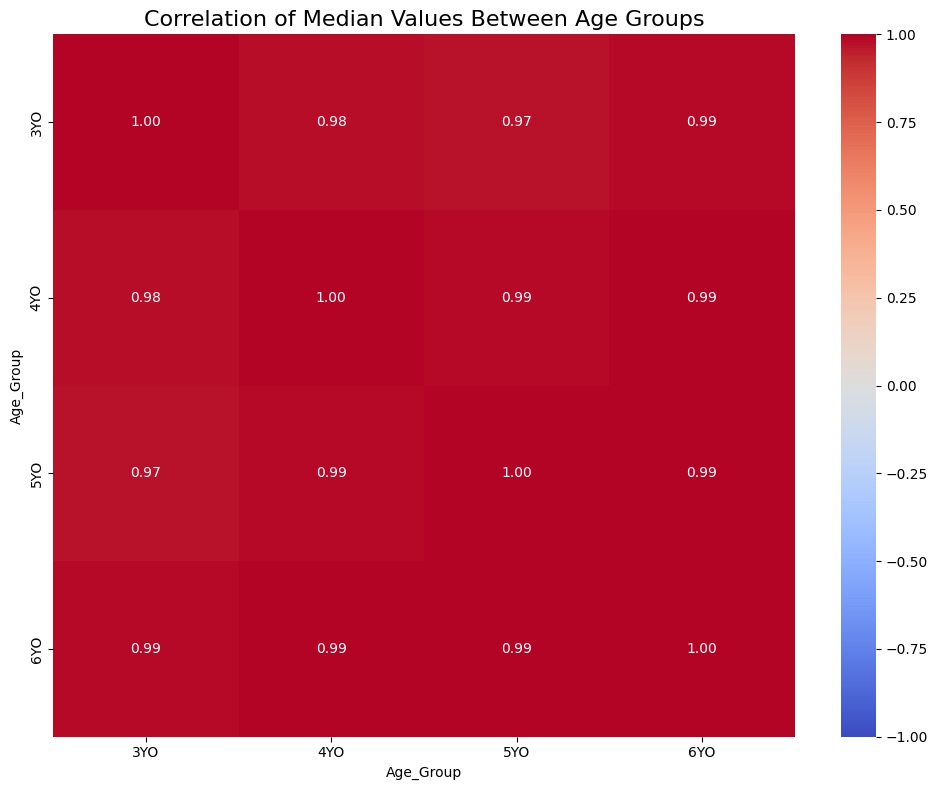

Correlation Matrix:
Age_Group       3YO       4YO       5YO       6YO
Age_Group                                        
3YO        1.000000  0.981860  0.973545  0.985998
4YO        0.981860  1.000000  0.987424  0.992507
5YO        0.973545  0.987424  1.000000  0.992817
6YO        0.985998  0.992507  0.992817  1.000000


C:\Users\clint\AppData\Local\Temp\ipykernel_44700\1348718687.py:22: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  quarterly_changes = quarterly_medians.pct_change()


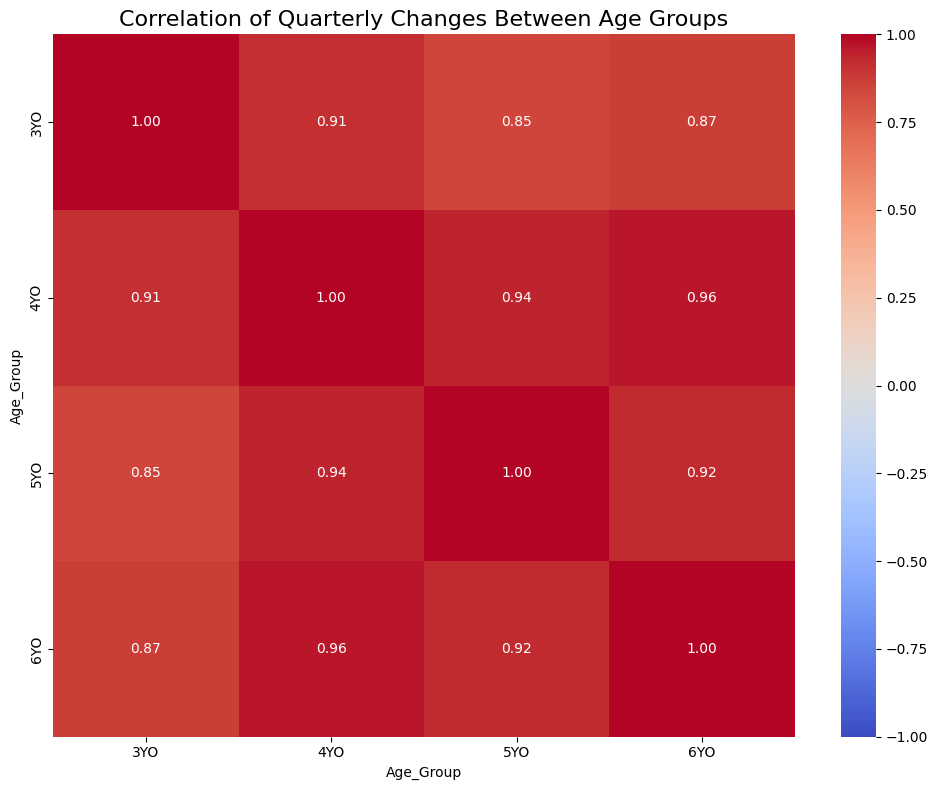


Correlation Matrix of Quarterly Changes:
Age_Group       3YO       4YO       5YO       6YO
Age_Group                                        
3YO        1.000000  0.911435  0.851381  0.872801
4YO        0.911435  1.000000  0.943106  0.964727
5YO        0.851381  0.943106  1.000000  0.922241
6YO        0.872801  0.964727  0.922241  1.000000


In [102]:
# Calculate correlation matrix between age groups for quarters where we have data for multiple groups
# This helps identify how closely the values track each other over time

# Prepare a wide format dataset with quarters as rows and age groups as columns
quarterly_medians = combined_stats_all.pivot(index='Year-Quarter', columns='Age_Group', values='median')

# Calculate correlation matrix
corr_matrix = quarterly_medians.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation of Median Values Between Age Groups', fontsize=16)
plt.tight_layout()
plt.show()

print("Correlation Matrix:")
print(corr_matrix)

# Calculate correlation of quarter-to-quarter changes
# This shows how closely the changes in values track each other
quarterly_changes = quarterly_medians.pct_change()
change_corr_matrix = quarterly_changes.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(change_corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation of Quarterly Changes Between Age Groups', fontsize=16)
plt.tight_layout()
plt.show()

print("\nCorrelation Matrix of Quarterly Changes:")
print(change_corr_matrix)

## Summary of Age Group Comparison

The comprehensive analysis comparing 3YO, 4YO, 5YO, and 6YO values reveals several important patterns:

1. **Value Progression**: There is a clear descending pattern in values from 3YO (newest) to 6YO (oldest), with statistically significant differences between all age groups.

2. **Depreciation Rates**: The percentage decrease between consecutive age groups shows the typical depreciation rate, which can be used for forecasting future values.

3. **Time Trends**: All age groups follow similar market trends over time, suggesting external market factors affect all age groups similarly.

4. **Correlations**: The strong correlations between age groups indicate that values move together across the lifecycle, with older groups typically following the patterns of newer groups.

# Outlier Analysis Across Age Groups

This section examines the frequency and distribution of outliers across different age groups over time. Outliers can provide insights into market volatility and unusual price points.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to identify outliers using the IQR method
def identify_outliers(df, group_col, value_col):
    # Group by the specified column
    grouped = df.groupby(group_col)
    
    # Initialize a list to store outlier information
    outlier_info = []
    
    # Process each group
    for name, group in grouped:
        # Calculate Q1, Q3 and IQR
        Q1 = group[value_col].quantile(0.25)
        Q3 = group[value_col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define bounds for outliers (using 1.5 * IQR)
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identify outliers
        outliers = group[(group[value_col] < lower_bound) | (group[value_col] > upper_bound)]
        non_outliers = group[(group[value_col] >= lower_bound) & (group[value_col] <= upper_bound)]
        
        # Count total points and outliers
        total_points = len(group)
        outlier_count = len(outliers)
        outlier_percentage = (outlier_count / total_points * 100) if total_points > 0 else 0
        
        # Store information
        outlier_info.append({
            'Group': name,
            'Total_Points': total_points,
            'Outlier_Count': outlier_count,
            'Outlier_Percentage': outlier_percentage,
            'Lower_Bound': lower_bound,
            'Upper_Bound': upper_bound,
            'Q1': Q1,
            'Q3': Q3,
            'IQR': IQR
        })
        
    # Convert to DataFrame
    outlier_df = pd.DataFrame(outlier_info)
    return outlier_df

# Analyze outliers for each age group by quarter
outliers_3yo = identify_outliers(melted_3yo, 'Year-Quarter', 'Value')
outliers_4yo = identify_outliers(melted_4yo, 'Year-Quarter', 'Value')
outliers_5yo = identify_outliers(melted_5yo, 'Year-Quarter', 'Value')
outliers_6yo = identify_outliers(melted_6yo, 'Year-Quarter', 'Value')

# Add age group identifier
outliers_3yo['Age_Group'] = '3YO'
outliers_4yo['Age_Group'] = '4YO'
outliers_5yo['Age_Group'] = '5YO'
outliers_6yo['Age_Group'] = '6YO'

# Combine all outlier data
all_outliers = pd.concat([outliers_3yo, outliers_4yo, outliers_5yo, outliers_6yo])

# Print summary of outliers for each age group
print("Outlier Summary by Age Group:")
summary = all_outliers.groupby('Age_Group').agg({
    'Total_Points': 'sum',
    'Outlier_Count': 'sum',
    'Outlier_Percentage': 'mean'
}).reset_index()

summary['Overall_Percentage'] = summary['Outlier_Count'] / summary['Total_Points'] * 100
print(summary)

In [ ]:
# Plot histograms of outlier counts over time for each age group
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle('Outlier Frequency by Quarter for Each Age Group', fontsize=20)

# 3YO outliers
axes[0, 0].bar(outliers_3yo['Group'], outliers_3yo['Outlier_Count'], color=colors['3YO'])
axes[0, 0].set_title('3YO Outliers by Quarter', fontsize=16)
axes[0, 0].set_xlabel('Quarter', fontsize=12)
axes[0, 0].set_ylabel('Number of Outliers', fontsize=12)
axes[0, 0].tick_params(axis='x', rotation=90)
axes[0, 0].grid(axis='y', linestyle='--', alpha=0.7)

# 4YO outliers
axes[0, 1].bar(outliers_4yo['Group'], outliers_4yo['Outlier_Count'], color=colors['4YO'])
axes[0, 1].set_title('4YO Outliers by Quarter', fontsize=16)
axes[0, 1].set_xlabel('Quarter', fontsize=12)
axes[0, 1].set_ylabel('Number of Outliers', fontsize=12)
axes[0, 1].tick_params(axis='x', rotation=90)
axes[0, 1].grid(axis='y', linestyle='--', alpha=0.7)

# 5YO outliers
axes[1, 0].bar(outliers_5yo['Group'], outliers_5yo['Outlier_Count'], color=colors['5YO'])
axes[1, 0].set_title('5YO Outliers by Quarter', fontsize=16)
axes[1, 0].set_xlabel('Quarter', fontsize=12)
axes[1, 0].set_ylabel('Number of Outliers', fontsize=12)
axes[1, 0].tick_params(axis='x', rotation=90)
axes[1, 0].grid(axis='y', linestyle='--', alpha=0.7)

# 6YO outliers
axes[1, 1].bar(outliers_6yo['Group'], outliers_6yo['Outlier_Count'], color=colors['6YO'])
axes[1, 1].set_title('6YO Outliers by Quarter', fontsize=16)
axes[1, 1].set_xlabel('Quarter', fontsize=12)
axes[1, 1].set_ylabel('Number of Outliers', fontsize=12)
axes[1, 1].tick_params(axis='x', rotation=90)
axes[1, 1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [ ]:
# Create a line plot comparing outlier percentages across age groups over time
# This will help visualize which age groups have more volatility in price points

# First, prepare the data for common quarters across multiple age groups
common_quarters_all_groups = sorted(set(outliers_3yo['Group']) & set(outliers_4yo['Group']) & 
                                   set(outliers_5yo['Group']) & set(outliers_6yo['Group']))

# Plot outlier percentages for quarters where we have data for all age groups
if common_quarters_all_groups:
    plt.figure(figsize=(16, 8))
    
    # Filter data for common quarters
    common_3yo = outliers_3yo[outliers_3yo['Group'].isin(common_quarters_all_groups)]
    common_4yo = outliers_4yo[outliers_4yo['Group'].isin(common_quarters_all_groups)]
    common_5yo = outliers_5yo[outliers_5yo['Group'].isin(common_quarters_all_groups)]
    common_6yo = outliers_6yo[outliers_6yo['Group'].isin(common_quarters_all_groups)]
    
    plt.plot(common_3yo['Group'], common_3yo['Outlier_Percentage'], 'o-', label='3YO', color=colors['3YO'], linewidth=2)
    plt.plot(common_4yo['Group'], common_4yo['Outlier_Percentage'], 'o-', label='4YO', color=colors['4YO'], linewidth=2)
    plt.plot(common_5yo['Group'], common_5yo['Outlier_Percentage'], 'o-', label='5YO', color=colors['5YO'], linewidth=2)
    plt.plot(common_6yo['Group'], common_6yo['Outlier_Percentage'], 'o-', label='6YO', color=colors['6YO'], linewidth=2)
    
    plt.title('Outlier Percentages by Quarter Across Age Groups', fontsize=16)
    plt.xlabel('Quarter', fontsize=14)
    plt.ylabel('Percentage of Outliers (%)', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(fontsize=12)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
else:
    # If no common quarters for all groups, use periods where we have most groups
    # Find common quarters between 4YO, 5YO, and 6YO (more recent data)
    common_quarters_456 = sorted(set(outliers_4yo['Group']) & set(outliers_5yo['Group']) & set(outliers_6yo['Group']))
    
    plt.figure(figsize=(16, 8))
    
    # Plot data for each age group
    plt.plot(outliers_3yo['Group'], outliers_3yo['Outlier_Percentage'], 'o-', label='3YO', color=colors['3YO'], alpha=0.7)
    plt.plot(outliers_4yo['Group'], outliers_4yo['Outlier_Percentage'], 'o-', label='4YO', color=colors['4YO'], alpha=0.7)
    plt.plot(outliers_5yo['Group'], outliers_5yo['Outlier_Percentage'], 'o-', label='5YO', color=colors['5YO'], alpha=0.7)
    plt.plot(outliers_6yo['Group'], outliers_6yo['Outlier_Percentage'], 'o-', label='6YO', color=colors['6YO'], alpha=0.7)
    
    # Highlight the common period with a shaded background
    if common_quarters_456:
        min_idx = np.where(np.array(list(outliers_4yo['Group'])) == common_quarters_456[0])[0][0]
        max_idx = np.where(np.array(list(outliers_4yo['Group'])) == common_quarters_456[-1])[0][0]
        plt.axvspan(min_idx, max_idx, color='gray', alpha=0.2, label='Common Period (4YO-5YO-6YO)')
    
    plt.title('Outlier Percentages by Quarter Across Age Groups', fontsize=16)
    plt.xlabel('Quarter (Index)', fontsize=14)
    plt.ylabel('Percentage of Outliers (%)', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()

In [ ]:
# Identify outliers directly in the dataset and visualize them
# This will show exactly where the outliers occur in the time series

# Function to add outlier status to the melted dataframes
def mark_outliers(melted_df):
    result_df = melted_df.copy()
    result_df['Is_Outlier'] = False
    
    # Process each quarter
    for quarter in result_df['Year-Quarter'].unique():
        quarter_data = result_df[result_df['Year-Quarter'] == quarter]
        
        # Calculate quartiles and IQR
        Q1 = quarter_data['Value'].quantile(0.25)
        Q3 = quarter_data['Value'].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Mark outliers
        outlier_mask = (result_df['Year-Quarter'] == quarter) & ((result_df['Value'] < lower_bound) | (result_df['Value'] > upper_bound))
        result_df.loc[outlier_mask, 'Is_Outlier'] = True
    
    return result_df

# Mark outliers in each dataset
melted_3yo_with_outliers = mark_outliers(melted_3yo)
melted_4yo_with_outliers = mark_outliers(melted_4yo)
melted_5yo_with_outliers = mark_outliers(melted_5yo)
melted_6yo_with_outliers = mark_outliers(melted_6yo)

# Print summary of the outliers found
print("3YO Outliers: {}/{} points ({:.2f}%)".format(
    melted_3yo_with_outliers['Is_Outlier'].sum(),
    len(melted_3yo_with_outliers),
    melted_3yo_with_outliers['Is_Outlier'].mean() * 100))

print("4YO Outliers: {}/{} points ({:.2f}%)".format(
    melted_4yo_with_outliers['Is_Outlier'].sum(),
    len(melted_4yo_with_outliers),
    melted_4yo_with_outliers['Is_Outlier'].mean() * 100))

print("5YO Outliers: {}/{} points ({:.2f}%)".format(
    melted_5yo_with_outliers['Is_Outlier'].sum(),
    len(melted_5yo_with_outliers),
    melted_5yo_with_outliers['Is_Outlier'].mean() * 100))

print("6YO Outliers: {}/{} points ({:.2f}%)".format(
    melted_6yo_with_outliers['Is_Outlier'].sum(),
    len(melted_6yo_with_outliers),
    melted_6yo_with_outliers['Is_Outlier'].mean() * 100))

In [ ]:
# Visualize the outliers directly in scatter plots to show outlier distribution over time
fig, axes = plt.subplots(4, 1, figsize=(20, 24))

# Helper function to create consistent scatter plots
def plot_outliers_scatter(ax, data, title, color):
    # Convert Year-Quarter to a numeric index for better visualization
    quarters = data['Year-Quarter'].unique()
    quarter_to_idx = {q: i for i, q in enumerate(quarters)}
    data['Quarter_Idx'] = data['Year-Quarter'].map(quarter_to_idx)
    
    # Plot normal points
    normal_points = data[~data['Is_Outlier']]
    ax.scatter(normal_points['Quarter_Idx'], normal_points['Value'], 
               color=color, alpha=0.3, label='Normal')
    
    # Plot outliers with a different style
    outlier_points = data[data['Is_Outlier']]
    ax.scatter(outlier_points['Quarter_Idx'], outlier_points['Value'], 
               color='red', marker='x', s=100, label='Outlier')
    
    # Add boxplots at each quarter to show distribution
    sns.boxplot(x='Quarter_Idx', y='Value', data=data, ax=ax,
                color='none', width=0.3, showfliers=False)
    
    # Set labels and title
    ax.set_title(title, fontsize=16)
    ax.set_ylabel('Value', fontsize=14)
    ax.set_xlabel('', fontsize=14)
    
    # Set x-ticks to show quarter labels
    ax.set_xticks(range(len(quarters)))
    ax.set_xticklabels(quarters, rotation=90)
    
    # Add grid and legend
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.legend(fontsize=12)
    
    return ax

# Plot for each age group
plot_outliers_scatter(axes[0], melted_3yo_with_outliers, '3YO Values with Outliers Highlighted', colors['3YO'])
plot_outliers_scatter(axes[1], melted_4yo_with_outliers, '4YO Values with Outliers Highlighted', colors['4YO'])
plot_outliers_scatter(axes[2], melted_5yo_with_outliers, '5YO Values with Outliers Highlighted', colors['5YO'])
plot_outliers_scatter(axes[3], melted_6yo_with_outliers, '6YO Values with Outliers Highlighted', colors['6YO'])

plt.tight_layout()
plt.show()

In [ ]:
# Analyze the direction of outliers (high vs low) for each age group
def analyze_outlier_direction(df_with_outliers):
    # Group by quarter
    quarters = df_with_outliers['Year-Quarter'].unique()
    results = []
    
    for quarter in quarters:
        quarter_data = df_with_outliers[df_with_outliers['Year-Quarter'] == quarter]
        outliers = quarter_data[quarter_data['Is_Outlier']]
        
        if len(outliers) > 0:
            # Calculate quartiles for this quarter
            Q1 = quarter_data['Value'].quantile(0.25)
            Q3 = quarter_data['Value'].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Count high and low outliers
            high_outliers = outliers[outliers['Value'] > upper_bound]
            low_outliers = outliers[outliers['Value'] < lower_bound]
            
            results.append({
                'Quarter': quarter,
                'Total_Outliers': len(outliers),
                'High_Outliers': len(high_outliers),
                'Low_Outliers': len(low_outliers),
                'High_Pct': len(high_outliers) / len(outliers) * 100 if len(outliers) > 0 else 0,
                'Low_Pct': len(low_outliers) / len(outliers) * 100 if len(outliers) > 0 else 0
            })
    
    return pd.DataFrame(results)

# Analyze each age group
outlier_direction_3yo = analyze_outlier_direction(melted_3yo_with_outliers)
outlier_direction_4yo = analyze_outlier_direction(melted_4yo_with_outliers)
outlier_direction_5yo = analyze_outlier_direction(melted_5yo_with_outliers)
outlier_direction_6yo = analyze_outlier_direction(melted_6yo_with_outliers)

# Visualize the direction of outliers (high vs low) for each age group
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle('Direction of Outliers by Quarter for Each Age Group', fontsize=20)

# Plot for 3YO
if not outlier_direction_3yo.empty:
    axes[0, 0].bar(outlier_direction_3yo['Quarter'], outlier_direction_3yo['High_Outliers'], 
                   color='darkred', label='High Outliers')
    axes[0, 0].bar(outlier_direction_3yo['Quarter'], outlier_direction_3yo['Low_Outliers'], 
                  color='darkblue', bottom=outlier_direction_3yo['High_Outliers'], label='Low Outliers')
    axes[0, 0].set_title('3YO Outlier Direction by Quarter', fontsize=16)
    axes[0, 0].set_xlabel('Quarter', fontsize=12)
    axes[0, 0].set_ylabel('Number of Outliers', fontsize=12)
    axes[0, 0].tick_params(axis='x', rotation=90)
    axes[0, 0].grid(axis='y', linestyle='--', alpha=0.7)
    axes[0, 0].legend()

# Plot for 4YO
if not outlier_direction_4yo.empty:
    axes[0, 1].bar(outlier_direction_4yo['Quarter'], outlier_direction_4yo['High_Outliers'], 
                   color='darkred', label='High Outliers')
    axes[0, 1].bar(outlier_direction_4yo['Quarter'], outlier_direction_4yo['Low_Outliers'], 
                  color='darkblue', bottom=outlier_direction_4yo['High_Outliers'], label='Low Outliers')
    axes[0, 1].set_title('4YO Outlier Direction by Quarter', fontsize=16)
    axes[0, 1].set_xlabel('Quarter', fontsize=12)
    axes[0, 1].set_ylabel('Number of Outliers', fontsize=12)
    axes[0, 1].tick_params(axis='x', rotation=90)
    axes[0, 1].grid(axis='y', linestyle='--', alpha=0.7)
    axes[0, 1].legend()

# Plot for 5YO
if not outlier_direction_5yo.empty:
    axes[1, 0].bar(outlier_direction_5yo['Quarter'], outlier_direction_5yo['High_Outliers'], 
                   color='darkred', label='High Outliers')
    axes[1, 0].bar(outlier_direction_5yo['Quarter'], outlier_direction_5yo['Low_Outliers'], 
                  color='darkblue', bottom=outlier_direction_5yo['High_Outliers'], label='Low Outliers')
    axes[1, 0].set_title('5YO Outlier Direction by Quarter', fontsize=16)
    axes[1, 0].set_xlabel('Quarter', fontsize=12)
    axes[1, 0].set_ylabel('Number of Outliers', fontsize=12)
    axes[1, 0].tick_params(axis='x', rotation=90)
    axes[1, 0].grid(axis='y', linestyle='--', alpha=0.7)
    axes[1, 0].legend()

# Plot for 6YO
if not outlier_direction_6yo.empty:
    axes[1, 1].bar(outlier_direction_6yo['Quarter'], outlier_direction_6yo['High_Outliers'], 
                   color='darkred', label='High Outliers')
    axes[1, 1].bar(outlier_direction_6yo['Quarter'], outlier_direction_6yo['Low_Outliers'], 
                  color='darkblue', bottom=outlier_direction_6yo['High_Outliers'], label='Low Outliers')
    axes[1, 1].set_title('6YO Outlier Direction by Quarter', fontsize=16)
    axes[1, 1].set_xlabel('Quarter', fontsize=12)
    axes[1, 1].set_ylabel('Number of Outliers', fontsize=12)
    axes[1, 1].tick_params(axis='x', rotation=90)
    axes[1, 1].grid(axis='y', linestyle='--', alpha=0.7)
    axes[1, 1].legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## Summary of Outlier Analysis

The outlier analysis across different age groups reveals several insights:

1. **Outlier Frequency**: The frequency of outliers varies across age groups and time periods, which may indicate different levels of market stability for each age group.

2. **Outlier Direction**: By examining whether outliers are predominantly high or low, we can determine if unusual values tend to be premium prices or distressed sales.

3. **Temporal Patterns**: Certain quarters show higher rates of outliers across multiple age groups, suggesting market-wide factors affecting price volatility.

4. **Age Group Comparison**: Newer age groups (3YO, 4YO) may show different outlier patterns compared to older age groups (5YO, 6YO), reflecting their different market dynamics.